In [ ]:
!pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26772 sha256=cf66c9a62fcbc1e7086c15c7d6368ac89eb72c717d10f49b2fe9e023f2dede2c
  Stored in directory: /root/.cache/pip/wheels/68/5d/a5/edc271b998f909801d7956959f699b976cc9896075dc47c153
Successfully built pandasql


In [ ]:
import pandas as pd
import numpy as np
import pandasql as ps
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

#IMPORT DATASET

In [ ]:
#import dataset
dataset_spotify = pd.read_csv("/content/dataset.csv", sep=',')
dataset_spotify.rename(columns={"artists" : "artist_name"}, inplace=True)
dataset_spotify.head(5)

,Unnamed: 0,track_id,artist_name,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
 #import dataset
spotify_history = pd.read_csv("/content/spotify_history.csv", sep=',')
spotify_history.rename(columns={"ts" : "play_time"}, inplace=True)
spotify_history.head(5)

,spotify_track_uri,play_time,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,7/8/2013 2:44,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,7/8/2013 2:45,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,7/8/2013 2:50,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,7/8/2013 2:52,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,7/8/2013 3:17,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False


#DATA CLEANING

In [ ]:
dataset_spotify = dataset_spotify.drop(columns=["Unnamed:0"], errors="ignore")
spotify_history = spotify_history.drop(columns=["Unnamed:0"], errors="ignore")


In [ ]:
#checking for null or missing value
dataset_spotify.info()
spotify_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artist_name       113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

#Handling Inconsistent Data (Menangani Data Tidak Konsisten)

In [ ]:
# Ubah semua kolom kunci ke huruf kecil & hapus spasi ekstra
for col in ['track_name', 'artist_name', 'album_name']:
    spotify_history[col] = spotify_history[col].astype(str).str.title().str.strip()
    dataset_spotify[col] = dataset_spotify[col].astype(str).str.title().str.strip()

import re

def clean_text(text):
    if isinstance(text, str):
        return re.sub(r'[^a-zA-Z0-9 ]+', '', text)  # Hanya huruf, angka, dan spasi
    return text

# Terapkan ke semua kolom kunci
for col in ['track_name', 'artist_name', 'album_name']:
    spotify_history[col] = spotify_history[col].apply(clean_text)
    dataset_spotify[col] = dataset_spotify[col].apply(clean_text)

def remove_selected_punctuation(text):
    if isinstance(text, str):
        return re.sub(r'[-?;,.!]', '', text)  # Menghapus tanda - ? ; , . !
    return text

for col in ['track_name', 'artist_name', 'album_name']:
    spotify_history[col] = spotify_history[col].apply(remove_selected_punctuation)
    dataset_spotify[col] = dataset_spotify[col].apply(remove_selected_punctuation)

# Bersihkan semua kolom kunci di kedua dataset
for col in ['track_name', 'artist_name', 'album_name']:
    spotify_history[col] = spotify_history[col].astype(str).apply(clean_text)
    dataset_spotify[col] = dataset_spotify[col].astype(str).apply(clean_text)


In [ ]:
# Hapus duplikat berdasarkan kolom track_name, artist_name, album_name
dataset_spotify = dataset_spotify.drop_duplicates(subset=['track_name', 'artist_name', 'album_name'])
# Hapus duplikat berdasarkan kolom track_name, artist_name, album_name
spotify_history = spotify_history.drop_duplicates(subset=['track_name', 'artist_name', 'album_name'])

In [ ]:
# Menampilkan 5 baris pertama dalam bentuk tabel
display(spotify_history.sample(5))

,spotify_track_uri,play_time,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
7344,1nFZP09atBdGKlfOVjesSB,12/5/2016 2:42,iOS,3900,Every Road,The Maine,Black White,fwdbtn,fwdbtn,True,True
129111,4bVYbMRSPfIwCPRa3wTxr2,1/2/2023 19:06,android,85654,Isolate,Tojo Mcbee,Isolate,trackdone,trackdone,True,False
45389,0fl1fDzh0kk3ikaoofO4Dg,9/10/2018 20:32,android,249040,Jet Remastered 2010,Paul Mccartney,Band On The Run,trackdone,trackdone,False,False
103864,5YsdcIOa9LYt9ac7mtlcle,7/11/2021 9:47,android,2937,Pool Party,Gold School,Pool Party,clickrow,endplay,False,False
140354,0RNoltWT0pfyfjAWgLgUa9,1/6/2024 5:04,android,237000,La Sitiera,Omara Portuondo,Omara Portuondo,trackdone,trackdone,False,False


In [ ]:
# Menampilkan 5 baris pertama dalam bentuk tabel
display(dataset_spotify.head(5))

,Unnamed: 0,track_id,artist_name,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost Acoustic,Ghost Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid MichaelsonZayn,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians Original Motion Picture Soun...,CanT Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
#mengubah format date untuk play time
spotify_history['play_time'] = pd.to_datetime(spotify_history['play_time'], format='%m/%d/%Y %H:%M', errors='coerce')

In [ ]:
display(spotify_history.head(5))

,spotify_track_uri,play_time,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:00,web player,3185,Say It Just Say It,The MowgliS,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:00,web player,61865,Drinking From The Bottle Feat Tinie Tempah,Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:00,web player,285386,Born To Die,Lana Del Rey,Born To Die The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:00,web player,134022,Off To The Races,Lana Del Rey,Born To Die The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:00,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False


In [ ]:
#Track record spotify in 2023-2024
df_2023_2024 = spotify_history[
    (spotify_history['play_time'] >= '2023-01-01') &
    (spotify_history['play_time'] < '2025-01-01')
]
display(df_2023_2024.head(5))

,spotify_track_uri,play_time,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
128975,5Zn66o8UqjE1e5CtOtM3co,2023-01-01 01:20:00,android,240099,The Show Goes On,Lupe Fiasco,The Show Goes On,trackdone,trackdone,False,False
129092,3oRRbrNXNLU21IYIcL0Ivb,2023-01-02 17:38:00,android,379493,Ken,Nathan Francis,Diamond Back,playbtn,trackdone,True,False
129093,2JR1WeETsXmFR1kRC2oXXq,2023-01-02 17:41:00,android,168666,Where Or When,Wynton Marsalis,Standard Time Vol 3 The Resolution Of Romance,trackdone,trackdone,True,False
129094,1UuGIqqp2QhYZU0N2PRh9G,2023-01-02 17:46:00,android,293253,Easy Living,Massimo Fara Trio,How My Heart Sings,trackdone,trackdone,True,False
129095,62kqshOHXpzRjnjU32j3tk,2023-01-02 17:51:00,android,318000,Tutto,Lorenzo Tucci,Happy End,trackdone,trackdone,True,False


In [ ]:
#cek Nan
print(spotify_history.isna().sum())

spotify_track_uri     0
play_time             0
platform              0
ms_played             0
track_name            0
artist_name           0
album_name            0
reason_start         42
reason_end           53
shuffle               0
skipped               0
dtype: int64


In [ ]:
#cek Nan
print(dataset_spotify.isna().sum())

Unnamed: 0          0
track_id            0
artist_name         0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [ ]:
# Cek album yang ada di spotify_history tapi tidak ada di dataset_spotify
missing_albums = set(spotify_history['album_name']) - set(dataset_spotify['album_name'])
print(f"Jumlah album yang tidak ditemukan: {len(missing_albums)}")
#print("Contoh album yang tidak ditemukan:", list(missing_albums)[:10])

# Cek track yang ada di spotify_history tapi tidak ada di dataset_spotify
missing_tracks = set(spotify_history['track_name']) - set(dataset_spotify['track_name'])
print(f"Jumlah track yang tidak ditemukan: {len(missing_tracks)}")
#print("Contoh track yang tidak ditemukan:", list(missing_tracks)[:10])

missing_artist = set(spotify_history['artist_name']) - set(dataset_spotify['artist_name'])
print(f"Jumlah artist yang tidak ditemukan: {len(missing_artist)}")

Jumlah album yang tidak ditemukan: 5934
Jumlah track yang tidak ditemukan: 9911
Jumlah artist yang tidak ditemukan: 2831


In [ ]:
#join dataset dengan inner join
merged_df = spotify_history.merge(
    dataset_spotify[['track_name', 'artist_name', 'album_name', 'track_genre', 'popularity']],
    on=['track_name', 'artist_name', 'album_name'],
    how='inner',  # Menggunakan inner join
    indicator=True
)
print(merged_df[['track_genre', 'popularity']].isna().sum())

track_genre    0
popularity     0
dtype: int64


In [ ]:
'''
merged_df = spotify_history.merge(
    dataset_spotify[['track_name', 'artist_name', 'album_name', 'track_genre', 'popularity']],
    on=['track_name', 'artist_name', 'album_name'],  # Merge lebih spesifik
    how='left'
)

# Cek jumlah NaN setelah merge
print(merged_df[['track_genre', 'popularity']].isna().sum())
'''

"\nmerged_df = spotify_history.merge(\n    dataset_spotify[['track_name', 'artist_name', 'album_name', 'track_genre', 'popularity']],\n    on=['track_name', 'artist_name', 'album_name'],  # Merge lebih spesifik\n    how='left'\n)\n\n# Cek jumlah NaN setelah merge\nprint(merged_df[['track_genre', 'popularity']].isna().sum())\n"

In [ ]:
# Cek duplikasi berdasarkan track_name, artist_name, album_name
print(dataset_spotify.duplicated(subset=['track_name', 'artist_name', 'album_name']).sum())


0


In [ ]:
# Cek duplikasi berdasarkan track_name, artist_name, album_name
print(spotify_history.duplicated(subset=['track_name', 'artist_name', 'album_name']).sum())

0


In [ ]:
# Cek track yang ada di spotify_history tapi tidak ditemukan di dataset_spotify
missing_tracks = spotify_history[~spotify_history['track_name'].isin(dataset_spotify['track_name'])]
print(f"Jumlah track yang tidak ditemukan: {len(missing_tracks)}")
#print("Contoh track yang tidak ditemukan:", missing_tracks[['track_name', 'artist_name', 'album_name']].head(10))

Jumlah track yang tidak ditemukan: 10586


In [ ]:
# Hitung persentase NaN di kolom popularity
nan_popularity = merged_df['popularity'].isna().sum()  # Hitung jumlah NaN pada popularity
total_popularity = len(merged_df)  # Total jumlah data
percent_nan_popularity = (nan_popularity / total_popularity) * 100  # Persentase NaN

# Hitung persentase NaN di kolom track_genre
nan_genre = merged_df['track_genre'].isna().sum()  # Hitung jumlah NaN pada track_genre
total_genre = len(merged_df)  # Total jumlah data
percent_nan_genre = (nan_genre / total_genre) * 100  # Persentase NaN

# Output hasilnya
print(f"Persentase NaN pada kolom 'popularity': {percent_nan_popularity:.2f}%")
print(f"Persentase NaN pada kolom 'track_genre': {percent_nan_genre:.2f}%")

Persentase NaN pada kolom 'popularity': 0.00%
Persentase NaN pada kolom 'track_genre': 0.00%


In [ ]:
len(dataset_spotify)

87508

In [ ]:
print(f"Jumlah baris spotify_history: {len(spotify_history)}")
print(f"Jumlah baris dataset_spotify: {len(dataset_spotify)}")

Jumlah baris spotify_history: 15421
Jumlah baris dataset_spotify: 87508


In [ ]:
# Jumlah data setelah inner join
print(f"Jumlah data setelah inner join: {len(merged_df)}")

Jumlah data setelah inner join: 1238


In [ ]:
merged_df.describe()

,play_time,ms_played,popularity
count,1238,1238.000000,1238.000000
mean,2019-03-21 20:19:20.355411968,140664.300485,65.145396
min,2013-07-08 03:17:00,0.000000,0.000000
25%,2016-12-05 00:41:00,22204.250000,58.000000
50%,2018-07-22 07:04:00,157836.000000,66.000000
75%,2021-09-11 08:51:15,222539.000000,75.000000
max,2024-11-22 19:55:00,684395.000000,97.000000
std,NaN,110176.605070,13.652395


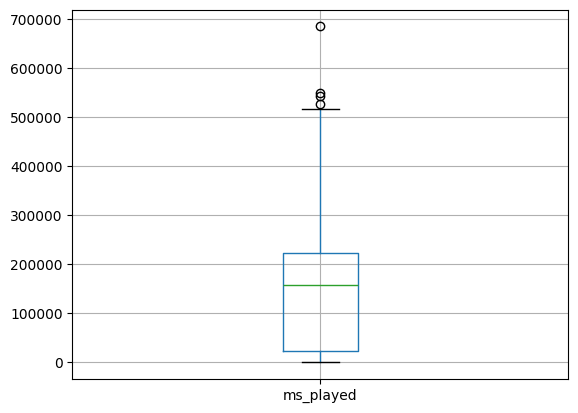

In [ ]:
#cek outlier w/ boxplot
merged_df.boxplot(column='ms_played')
plt.show()

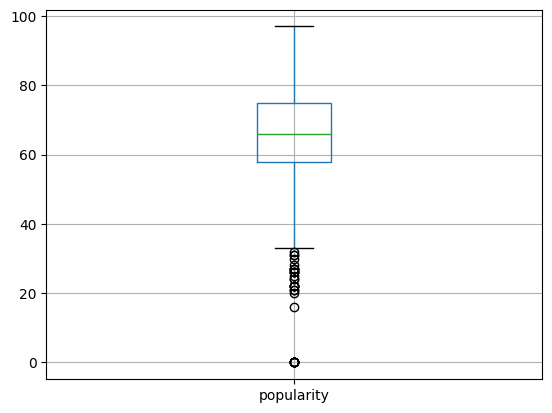

In [ ]:
#cek outlier w/ boxplot
merged_df.boxplot(column='popularity')
plt.show()

In [ ]:
display(merged_df.head(5))

,spotify_track_uri,play_time,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped,track_genre,popularity,_merge
0,1I4EczxGBcPR3J3KeyqFJP,2013-07-08 03:17:00,web player,0,We Own The Sky,M83,Saturdays Youth,nextbtn,nextbtn,False,False,french,51,both
1,4kO7mrAPfqIrsKwUOK5BFx,2013-07-08 03:20:00,web player,12846,Midnight City,M83,Hurry Up WeRe Dreaming,clickrow,clickrow,False,False,french,76,both
2,49h0RYK3yzWkfbVyNJjJ01,2013-07-08 03:22:00,web player,95817,Do I Wanna Know,Arctic Monkeys,Do I Wanna Know,clickrow,clickrow,False,False,garage,54,both
3,4iG2gAwKXsOcijVaVXzRPW,2013-07-08 03:22:00,web player,1763,Time To Pretend,Mgmt,Oracular Spectacular,clickrow,nextbtn,False,False,alt-rock,72,both
4,3FtYbEfBqAlGO46NUDQSAt,2013-07-08 03:41:00,web player,229589,Electric Feel,Mgmt,Oracular Spectacular,trackdone,trackdone,False,False,alt-rock,77,both


In [ ]:
import pandas as pd

# Pastikan 'play_time' dalam format datetime
merged_df['play_time'] = pd.to_datetime(merged_df['play_time'])

# Filter data hanya untuk tahun 2023
data_2023 = merged_df[merged_df['play_time'].dt.year == 2023].copy()

# Konversi durasi dari milidetik ke menit
data_2023['duration_min'] = data_2023['ms_played'] / (1000 * 60)

# Hitung statistik durasi pemutaran per genre
genre_duration = data_2023.groupby('track_genre')['duration_min'].agg(['mean', 'median', 'sum']).sort_values(by='sum', ascending=False)

# Tampilkan hasil
print(genre_duration)

                       mean    median        sum
track_genre                                     
guitar             2.489427  2.604408  44.809683
acoustic           3.546469  3.617592  28.371750
pop                3.571094  3.681217  21.426567
folk               3.701917  3.624433  18.509583
afrobeat           4.485192  3.891100  17.940767
british            4.447067  5.321517  17.788267
ambient            2.216510  1.829533  17.732083
swedish            3.526397  3.373100  17.631983
minimal-techno     7.087708  7.087708  14.175417
bluegrass          3.445306  3.543917  10.335917
chill              3.108689  3.154167   9.326067
comedy             4.271650  4.271650   8.543300
latin              4.260408  4.260408   8.520817
singer-songwriter  3.790942  3.790942   7.581883
deep-house         2.790692  2.790692   5.581383
hip-hop            4.736667  4.736667   4.736667
trance             4.370000  4.370000   4.370000
spanish            3.941767  3.941767   3.941767


In [ ]:
# Filter hanya lagu dengan genre "Minimal-techno" di tahun 2023
minimal_techno_songs = data_2023[data_2023['track_genre'] == 'minimal-techno'][['track_name', 'artist_name', 'duration_min']]

# Urutkan berdasarkan durasi (dari yang terpanjang ke terpendek)
minimal_techno_songs = minimal_techno_songs.sort_values(by='duration_min', ascending=False)

# Tampilkan hasilnya
print(minimal_techno_songs)


                   track_name artist_name  duration_min
1163  Kackvogel  Original Mix     Solomun      7.466750
1161                Hypnotize     Solomun      6.708667


In [ ]:
# Filter hanya lagu dengan genre "Minimal-techno" di tahun 2023
minimal_techno_songs = data_2023[data_2023['track_genre'] == 'guitar'][['track_name', 'artist_name', 'duration_min']]

# Urutkan berdasarkan durasi (dari yang terpanjang ke terpendek)
minimal_techno_songs = minimal_techno_songs.sort_values(by='duration_min', ascending=False)

# Tampilkan hasilnya
print(minimal_techno_songs)

                       track_name           artist_name  duration_min
1102   Let Me Reach That Mountain              RB James      3.525000
1127                   Ao Clarear          Dieter Huber      3.288583
1124              Die Wanderbiene           Felix Trapp      3.163533
1121                 Passing Rain           Marta Jobim      3.045833
1109  ItS A Small World After All           Robert Lowe      2.923983
1122      Largo Rv 443 For Guitar         Marcel Depuis      2.750350
1108                      Olomana     Andreas Borkental      2.662250
1107                Valsa E Vinho          Nelson Gomes      2.646567
1125                       Ordino           Kaspar Mann      2.629650
1100               Sonnen Diamant            Vandenberg      2.579167
1119                A Few Reasons        Toledo Heights      2.532333
1126                       Elegia  Antonio Garcia Isaac      2.466667
1110              Zitronen Garten          Dieter Huber      2.384300
1123             Str

In [ ]:
# Filter hanya lagu dengan genre "Minimal-techno" di tahun 2023
minimal_techno_songs = data_2023[data_2023['track_genre'] == 'comedy'][['track_name', 'artist_name', 'duration_min']]

# Urutkan berdasarkan durasi (dari yang terpanjang ke terpendek)
minimal_techno_songs = minimal_techno_songs.sort_values(by='duration_min', ascending=False)

# Tampilkan hasilnya
print(minimal_techno_songs)

                                track_name artist_name  duration_min
1157         Crazy Rap Colt 45  2 Zig Zags     Afroman      4.432433
1156  Because I Got High  Extended Version     Afroman      4.110867


In [ ]:
# Filter hanya lagu dengan genre "Minimal-techno" di tahun 2023
minimal_techno_songs = data_2023[data_2023['track_genre'] == 'ambient'][['track_name', 'artist_name', 'duration_min']]

# Urutkan berdasarkan durasi (dari yang terpanjang ke terpendek)
minimal_techno_songs = minimal_techno_songs.sort_values(by='duration_min', ascending=False)

# Tampilkan hasilnya
print(minimal_techno_songs)

                   track_name       artist_name  duration_min
1115                    Losar       Joep Beving      3.684350
1116                 Fracture    Stephan Moccio      3.460667
1113      My Fellow Creatures       Carlos Cipa      3.424883
1114  The Lily  Piano Version       Gabrel lafs      1.949333
1151              The Wedding   Jhann Jhannsson      1.709733
1152           Gnrique De Fin     Gabriel Yared      1.689583
1117            Natural Light  Ludovico Einaudi      0.980983
1118     Forces Of Attraction   Jhann Jhannsson      0.832550


In [ ]:
import pandas as pd

# Pastikan 'play_time' dalam format datetime
merged_df['play_time'] = pd.to_datetime(merged_df['play_time'])

# Filter data hanya untuk tahun 2023
data_2023 = merged_df[merged_df['play_time'].dt.year == 2023].copy()

# Konversi durasi dari milidetik ke menit
data_2023['duration_min'] = data_2023['ms_played'] / (1000 * 60)

# Hitung statistik durasi pemutaran per genre
genre_duration = data_2023.groupby('track_genre')['duration_min'].agg(['mean', 'median', 'sum']).sort_values(by='sum', ascending=False)

# Tampilkan hasil
print(genre_duration)


                       mean    median        sum
track_genre                                     
guitar             2.489427  2.604408  44.809683
acoustic           3.546469  3.617592  28.371750
pop                3.571094  3.681217  21.426567
folk               3.701917  3.624433  18.509583
afrobeat           4.485192  3.891100  17.940767
british            4.447067  5.321517  17.788267
ambient            2.216510  1.829533  17.732083
swedish            3.526397  3.373100  17.631983
minimal-techno     7.087708  7.087708  14.175417
bluegrass          3.445306  3.543917  10.335917
chill              3.108689  3.154167   9.326067
comedy             4.271650  4.271650   8.543300
latin              4.260408  4.260408   8.520817
singer-songwriter  3.790942  3.790942   7.581883
deep-house         2.790692  2.790692   5.581383
hip-hop            4.736667  4.736667   4.736667
trance             4.370000  4.370000   4.370000
spanish            3.941767  3.941767   3.941767


In [ ]:
# Hitung jumlah pemutaran per genre
play_count_per_genre = data_2023['track_genre'].value_counts()

# Tampilkan hasil
print(play_count_per_genre)


track_genre
guitar               18
ambient               8
acoustic              8
pop                   6
folk                  5
swedish               5
british               4
afrobeat              4
bluegrass             3
chill                 3
singer-songwriter     2
latin                 2
comedy                2
minimal-techno        2
deep-house            2
hip-hop               1
trance                1
spanish               1
Name: count, dtype: int64


In [ ]:
q=44.809683/18
q

2.4894268333333334

In [ ]:
import pandas as pd

# Konversi kolom play_time menjadi datetime
merged_df['play_time'] = pd.to_datetime(merged_df['play_time'], errors='coerce')

# Setelah konversi, filter data untuk tahun 2023
data_2023 = merged_df[merged_df['play_time'].dt.year == 2023]


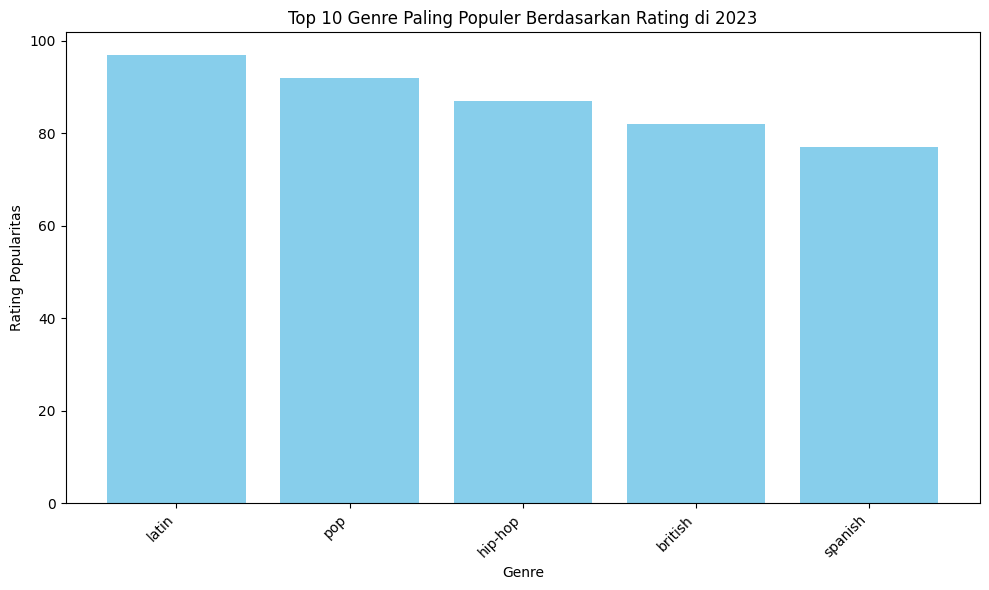

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Pastikan kolom play_time sudah dalam format datetime
merged_df['play_time'] = pd.to_datetime(merged_df['play_time'])

# Filter data untuk tahun 2023
data_2023 = merged_df[merged_df['play_time'].dt.year == 2023]

# Urutkan data berdasarkan kolom popularity secara menurun dan ambil 10 teratas
top_popular = data_2023.sort_values(by='popularity', ascending=False).head(10)

# Buat grafik bar untuk menampilkan rating popularitas
plt.figure(figsize=(10, 6))
plt.bar(top_popular['track_genre'], top_popular['popularity'], color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Rating Popularitas')
plt.title('Top 10 Genre Paling Populer Berdasarkan Rating di 2023')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<ipython-input-40-a9c1b145a7ae>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.index, y=top_genres.values, palette="pastel")


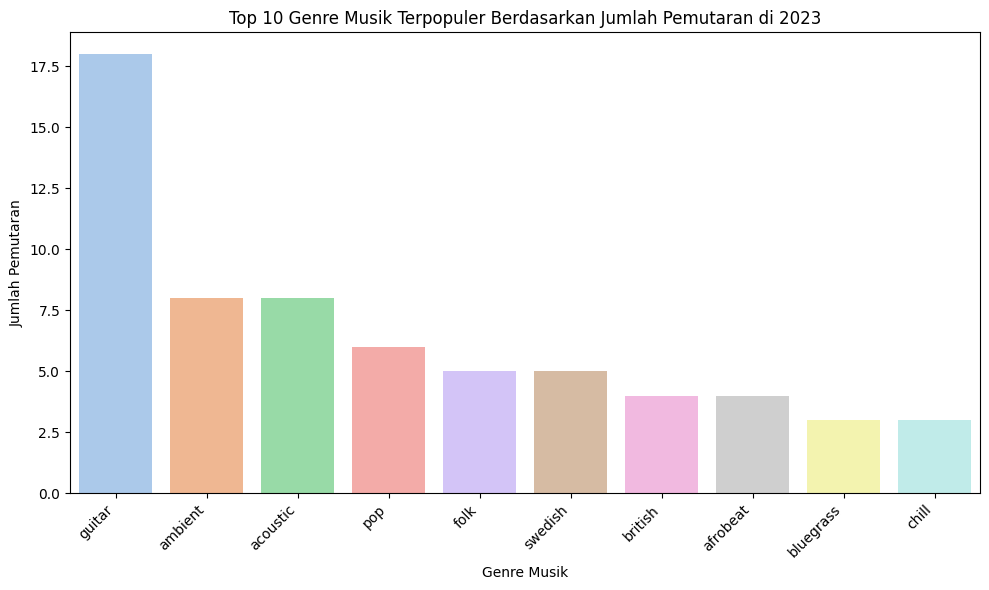

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan 'play_time' dalam format datetime
merged_df['play_time'] = pd.to_datetime(merged_df['play_time'])

# Filter data untuk tahun 2023
data_2023 = merged_df[merged_df['play_time'].dt.year == 2023]

# Hitung jumlah pemutaran berdasarkan genre
top_genres = data_2023['track_genre'].value_counts().nlargest(10)  # Ambil 10 genre teratas

# Buat bar chart berdasarkan jumlah pemutaran
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.index, y=top_genres.values, palette="pastel")

# Tambahkan label dan judul
plt.xlabel('Genre Musik')
plt.ylabel('Jumlah Pemutaran')
plt.title('Top 10 Genre Musik Terpopuler Berdasarkan Jumlah Pemutaran di 2023')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


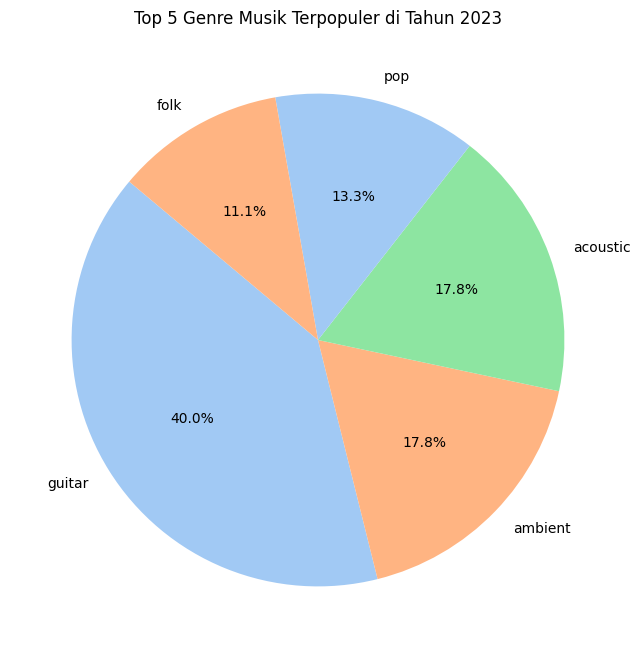

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan 'play_time' dalam format datetime
merged_df['play_time'] = pd.to_datetime(merged_df['play_time'])

# Filter data untuk tahun 2023
data_2023 = merged_df[merged_df['play_time'].dt.year == 2023]

# Hitung jumlah pemutaran berdasarkan genre
top_genres = data_2023['track_genre'].value_counts().nlargest(5)

# Plot pie chart
plt.figure(figsize=(8, 8))
colors = sns.color_palette("pastel")[:3]  # Warna pastel untuk visualisasi
#colors = ['#FF0000', '#0000FF', '#FFFF00', '#00FF00', '#800080']  # Warna merah, biru, kuning, hijau, ungu
plt.pie(top_genres, labels=top_genres.index, autopct='%1.1f%%', colors=colors, startangle=140)

# Tambahkan judul
plt.title("Top 5 Genre Musik Terpopuler di Tahun 2023")
plt.show()


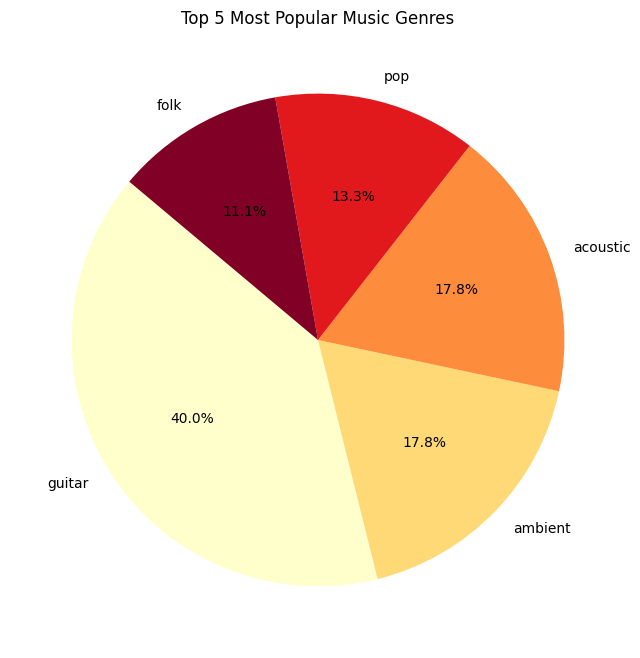

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Pastikan 'play_time' dalam format datetime
merged_df['play_time'] = pd.to_datetime(merged_df['play_time'])

# Filter data untuk tahun 2023
data_2023 = merged_df[merged_df['play_time'].dt.year == 2023]

# Hitung jumlah pemutaran berdasarkan genre
top_genres = data_2023['track_genre'].value_counts().nlargest(5)

# Plot pie chart
plt.figure(figsize=(8, 8))

# Membuat colormap dari kuning ke merah
colors = plt.cm.YlOrRd(np.linspace(0, 1, len(top_genres)))

plt.pie(top_genres, labels=top_genres.index, autopct='%1.1f%%', colors=colors, startangle=140)

# Tambahkan judul
plt.title("Top 5 Most Popular Music Genres")
plt.show()


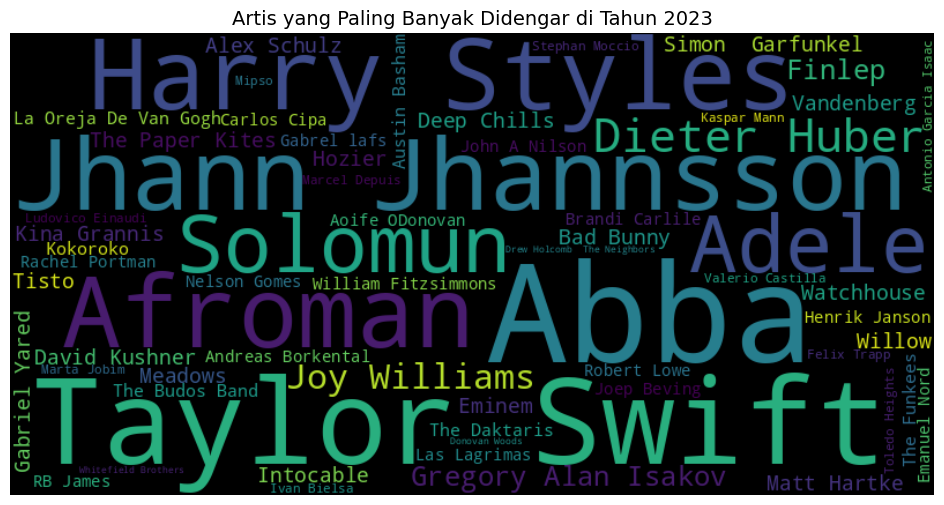

In [ ]:

from wordcloud import WordCloud

# Pastikan 'play_time' dalam format datetime
merged_df['play_time'] = pd.to_datetime(merged_df['play_time'])

# Filter data untuk tahun 2023
data_2023 = merged_df[merged_df['play_time'].dt.year == 2023]

# Hitung jumlah pemutaran berdasarkan artis
artist_counts = data_2023['artist_name'].value_counts()

# Buat Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='viridis',
                      max_words=100).generate_from_frequencies(artist_counts)

# Tampilkan Word Cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hilangkan axis
plt.title("Artis yang Paling Banyak Didengar di Tahun 2023", fontsize=14)
plt.show()


<Figure size 1200x600 with 0 Axes>

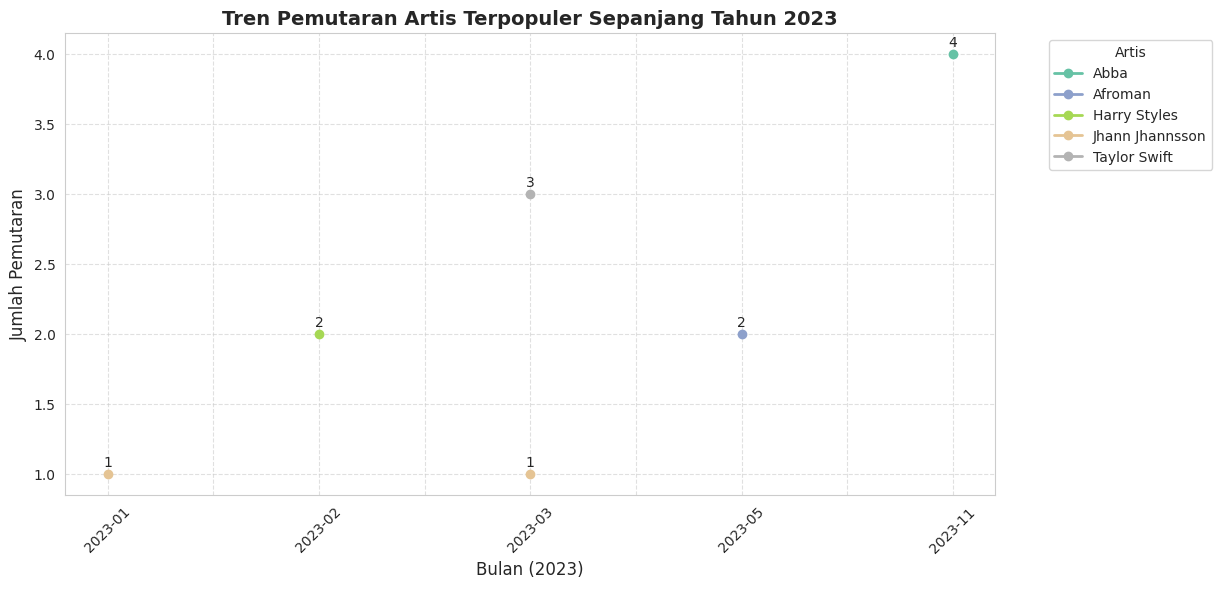

In [ ]:
# Pastikan 'play_time' dalam format datetime
merged_df['play_time'] = pd.to_datetime(merged_df['play_time'])

# Filter data untuk tahun 2023
data_2023 = merged_df[merged_df['play_time'].dt.year == 2023]

# Hitung jumlah pemutaran per bulan berdasarkan artis
top_artists = data_2023['artist_name'].value_counts().nlargest(5).index  # Ambil 5 artis terpopuler
data_top_artists = data_2023[data_2023['artist_name'].isin(top_artists)]  # Filter data untuk artis populer

# Kelompokkan jumlah pemutaran berdasarkan bulan
monthly_play_count = data_top_artists.groupby([data_top_artists['play_time'].dt.to_period('M'), 'artist_name']).size().unstack()

# **Solusi: Ubah index ke kategori agar tidak ada error plotting**
monthly_play_count.index = monthly_play_count.index.astype(str)  # Konversi PeriodIndex ke string
monthly_play_count.index = monthly_play_count.index.astype('category')  # Pastikan jadi kategori

# Buat plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
palette = sns.color_palette("husl", len(top_artists))

ax = monthly_play_count.plot(kind='line', marker='o', markersize=6, colormap="Set2", linewidth=2, figsize=(12, 6))

# Tambahkan anotasi pada setiap titik data
for artist in monthly_play_count.columns:
    for i, txt in enumerate(monthly_play_count[artist]):
        if not pd.isna(txt):  # Hanya anotasi untuk nilai yang ada
            ax.annotate(int(txt), (i, txt), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10)

# Format plot
plt.xlabel("Bulan (2023)", fontsize=12)
plt.ylabel("Jumlah Pemutaran", fontsize=12)
plt.title("Tren Pemutaran Artis Terpopuler Sepanjang Tahun 2023", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Artis", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)

plt.show()


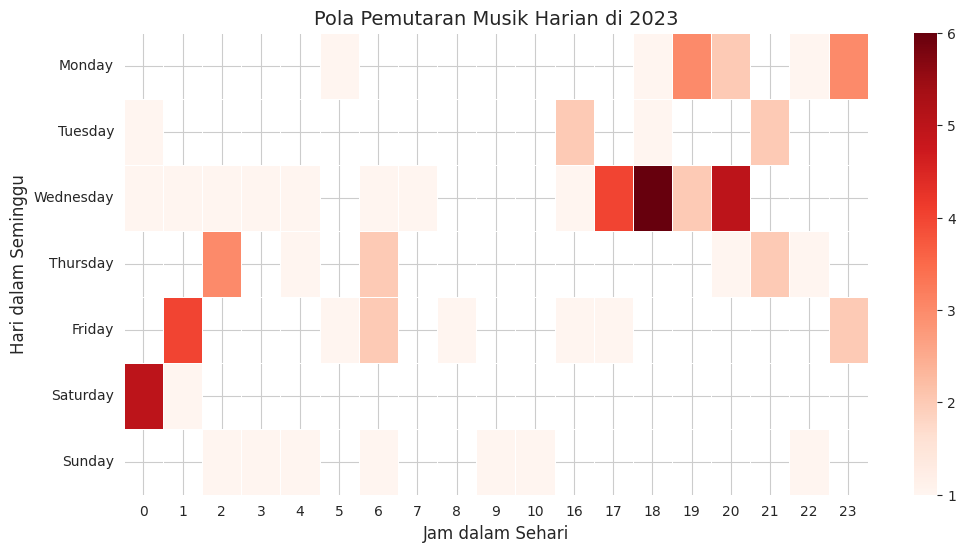

In [ ]:
# Pastikan data_2023 merupakan salinan independen dari DataFrame aslinya
data_2023 = data_2023.copy()

# Buat kolom hari dan jam dari play_time menggunakan .loc untuk assignment yang eksplisit
data_2023.loc[:, 'day_of_week'] = data_2023['play_time'].dt.day_name()
data_2023.loc[:, 'hour'] = data_2023['play_time'].dt.hour

# Pivot data untuk heatmap: hitung jumlah kemunculan track_name berdasarkan hari dan jam
heatmap_data = data_2023.pivot_table(index='day_of_week', columns='hour', values='track_name', aggfunc='count')

# Urutkan hari dalam seminggu
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
heatmap_data = heatmap_data.reindex(order)

# Buat heatmap dengan colormap "Reds"
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap=sns.color_palette("Reds", as_cmap=True), linewidths=0.5)

# Tambahkan label dan judul grafik
plt.xlabel("Jam dalam Sehari", fontsize=12)
plt.ylabel("Hari dalam Seminggu", fontsize=12)
plt.title("Pola Pemutaran Musik Harian di 2023", fontsize=14)

# Tampilkan grafik
plt.show()

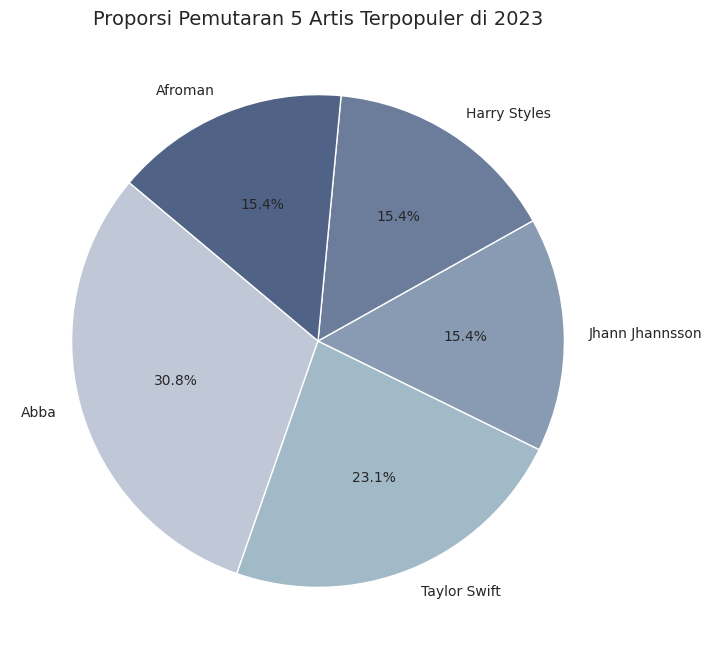

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Pastikan 'play_time' dalam format datetime
merged_df['play_time'] = pd.to_datetime(merged_df['play_time'])

# Filter data untuk tahun 2023
data_2023 = merged_df[merged_df['play_time'].dt.year == 2023]

# Hitung jumlah pemutaran per artis
top_artists = data_2023['artist_name'].value_counts().nlargest(5)  # Ambil 5 artis paling populer

# Warna soft dengan skema abu-abu ke biru
colors = ["#c0c7d6", "#a2b9c7", "#889bb2", "#6c7c9b", "#506285"]

# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_artists,
    labels=top_artists.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=140,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)

# Tambahkan judul
plt.title("Proporsi Pemutaran 5 Artis Terpopuler di 2023", fontsize=14)

# Tampilkan pie chart
plt.show()


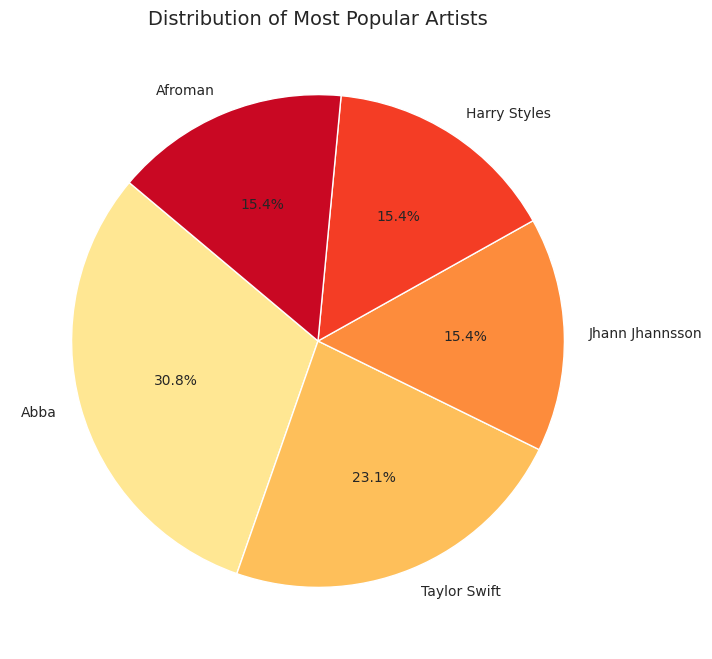

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan 'play_time' dalam format datetime
merged_df['play_time'] = pd.to_datetime(merged_df['play_time'])

# Filter data untuk tahun 2023
data_2023 = merged_df[merged_df['play_time'].dt.year == 2023]

# Hitung jumlah pemutaran per artis
top_artists = data_2023['artist_name'].value_counts().nlargest(5)  # Ambil 5 artis teratas

# Ambil warna dari colormap "YlOrRd" (Yellow → Orange → Red)
colors = sns.color_palette("YlOrRd", len(top_artists))

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_artists,
    labels=top_artists.index,
    autopct='%1.1f%%',  # Menampilkan persentase
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)

# Tambahkan judul
plt.title("Distribution of Most Popular Artists", fontsize=14)

# Tampilkan plot
plt.show()


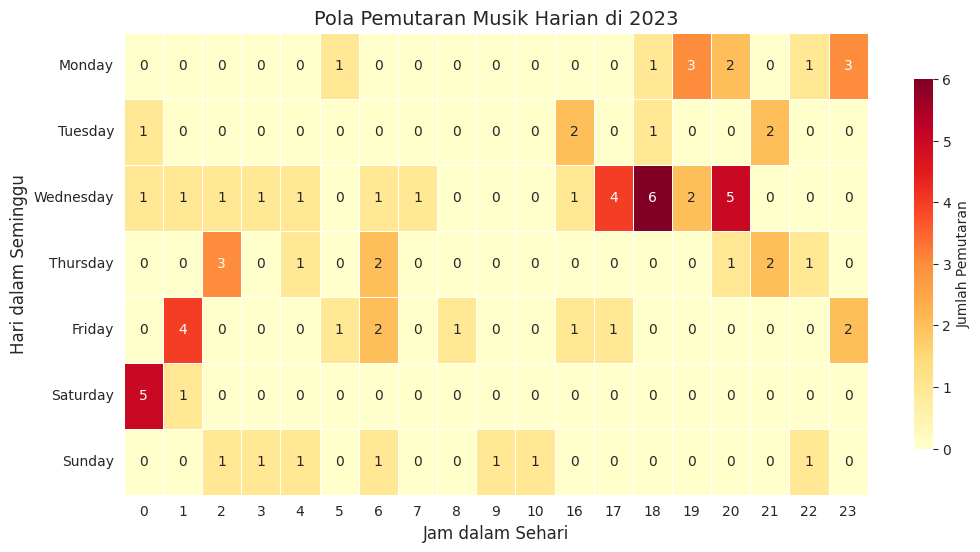

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan data_2023 sudah dibuat copy() sebelumnya, dan day_of_week serta hour sudah ditambahkan
data_2023 = data_2023.copy()

data_2023.loc[:, 'day_of_week'] = data_2023['play_time'].dt.day_name()
data_2023.loc[:, 'hour'] = data_2023['play_time'].dt.hour

# Buat pivot table
heatmap_data = data_2023.pivot_table(index='day_of_week', columns='hour',
                                     values='track_name', aggfunc='count')

# Urutkan hari dalam seminggu
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
heatmap_data = heatmap_data.reindex(order)

# Buat figure
plt.figure(figsize=(12, 6))

# Membuat heatmap:
# 1. cmap="YlOrRd" -> palet warna kuning ke oranye dan merah yang kontras
# 2. annot=True, fmt="d" -> menampilkan angka dalam sel, dengan format integer
# 3. cbar_kws={"shrink": 0.8, "label": "Jumlah Pemutaran"} -> mengecilkan colorbar dan menambah label
heatmap_data_int = heatmap_data.fillna(0).astype(int)

ax = sns.heatmap(
    heatmap_data_int,
    cmap="YlOrRd",
    linewidths=0.5,
    annot=True,
    fmt="d",  # Sekarang valid karena tipe data integer
    cbar_kws={"shrink": 0.8, "label": "Jumlah Pemutaran"}
)


# Label dan judul
plt.xlabel("Jam dalam Sehari", fontsize=12)
plt.ylabel("Hari dalam Seminggu", fontsize=12)
plt.title("Pola Pemutaran Musik Harian di 2023", fontsize=14)

# Tampilkan grafik
plt.show()


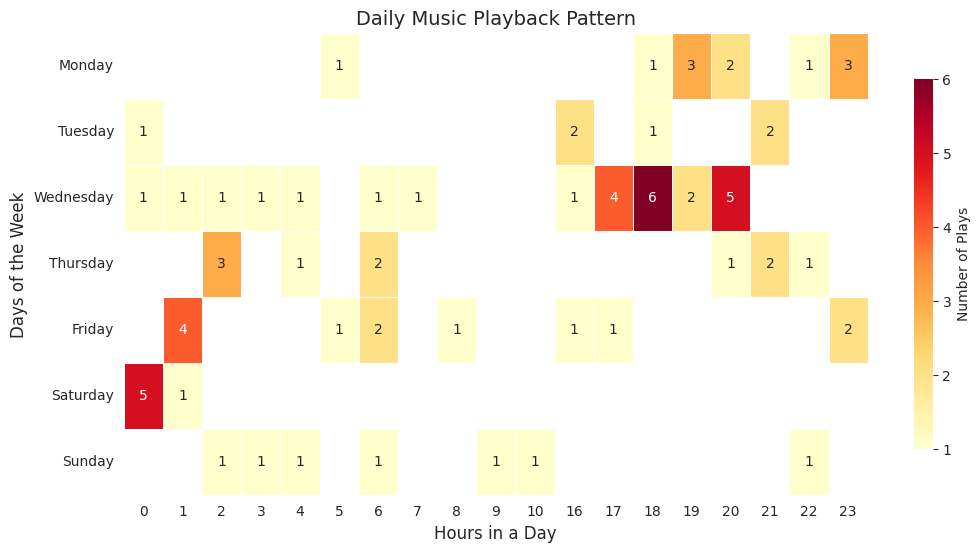

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Salin data untuk mencegah perubahan pada data asli
data_2023 = data_2023.copy()

# Buat kolom hari dan jam
data_2023.loc[:, 'day_of_week'] = data_2023['play_time'].dt.day_name()
data_2023.loc[:, 'hour'] = data_2023['play_time'].dt.hour

# Buat pivot table
heatmap_data = data_2023.pivot_table(index='day_of_week', columns='hour',
                                     values='track_name', aggfunc='count')

# Urutkan hari dalam seminggu
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
heatmap_data = heatmap_data.reindex(order)

# Ganti NaN dengan 0 dan ubah ke integer
heatmap_data_int = heatmap_data.fillna(0).astype(int)

# Buat mask untuk menyembunyikan nilai 0
mask = heatmap_data_int == 0

# Buat figure
plt.figure(figsize=(12, 6))

# Menghilangkan grid kotak-kotak
ax.grid(False)

# Membuat heatmap dengan mask
ax = sns.heatmap(
    heatmap_data_int,
    cmap="YlOrRd",
    linewidths=0.5,
    annot=True,
    fmt="d",
    mask=mask,  # **Menyembunyikan nilai 0**
    cbar_kws={"shrink": 0.8, "label": "Number of Plays"}
)

# Label dan judul
plt.xlabel("Hours in a Day", fontsize=12)
plt.ylabel("Days of the Week", fontsize=12)
plt.title("Daily Music Playback Pattern", fontsize=14)
ax.grid(False)
# Tampilkan grafik
plt.show()


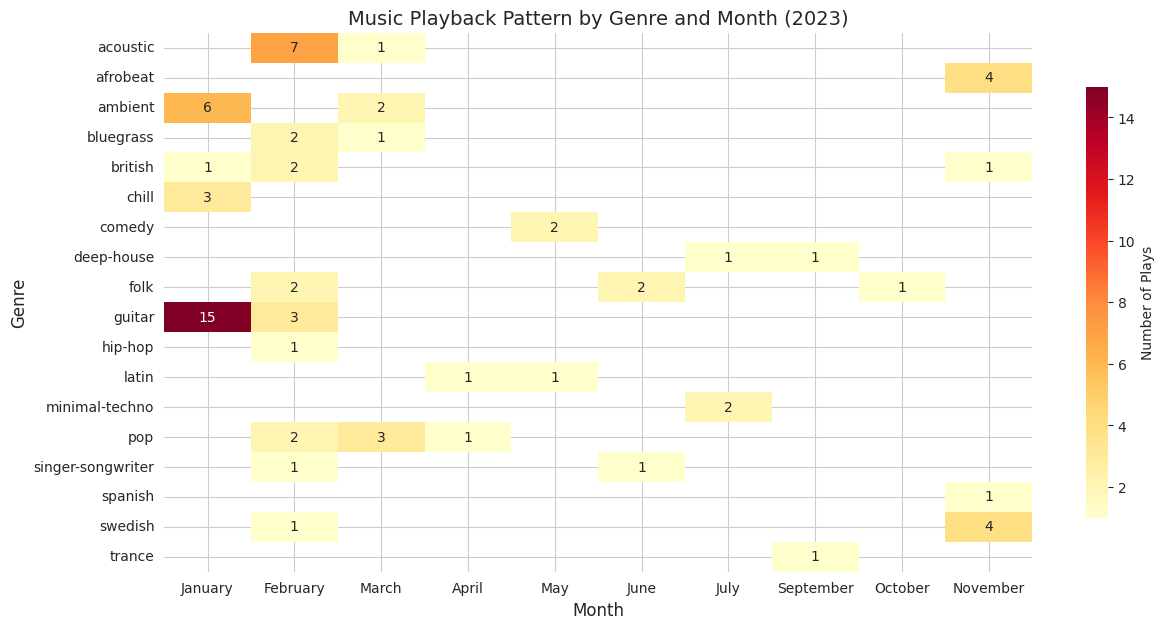

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Salin data untuk mencegah perubahan pada data asli
data_2023 = data_2023.copy()

# Buat kolom bulan
data_2023.loc[:, 'month'] = data_2023['play_time'].dt.strftime('%B')

# Urutkan bulan sesuai urutan kalender
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

# Buat pivot table dengan bulan sebagai sumbu X dan genre sebagai sumbu Y
heatmap_data = data_2023.pivot_table(index='track_genre', columns='month',
                                     values='track_name', aggfunc='count')

# Ambil hanya bulan yang ada dalam dataset agar tidak terjadi error
available_months = [month for month in month_order if month in heatmap_data.columns]
heatmap_data = heatmap_data[available_months]  # Urutkan berdasarkan bulan yang tersedia

# Ganti NaN dengan 0 dan ubah ke integer
heatmap_data_int = heatmap_data.fillna(0).astype(int)

# Buat mask untuk menyembunyikan nilai 0
mask = heatmap_data_int == 0

# Buat figure
plt.figure(figsize=(14, 7))

# Membuat heatmap tanpa grid kotak-kotak dan dengan mask
ax = sns.heatmap(
    heatmap_data_int,
    cmap="YlOrRd",
    linewidths=0,  # Menghilangkan grid kotak-kotak
    annot=True,
    fmt="d",
    mask=mask,  # Menyembunyikan nilai 0
    cbar_kws={"shrink": 0.8, "label": "Number of Plays"}
)

# Label dan judul
plt.xlabel("Month", fontsize=12)
plt.ylabel("Genre", fontsize=12)
plt.title("Music Playback Pattern by Genre and Month (2023)", fontsize=14)

# Tampilkan grafik
plt.show()


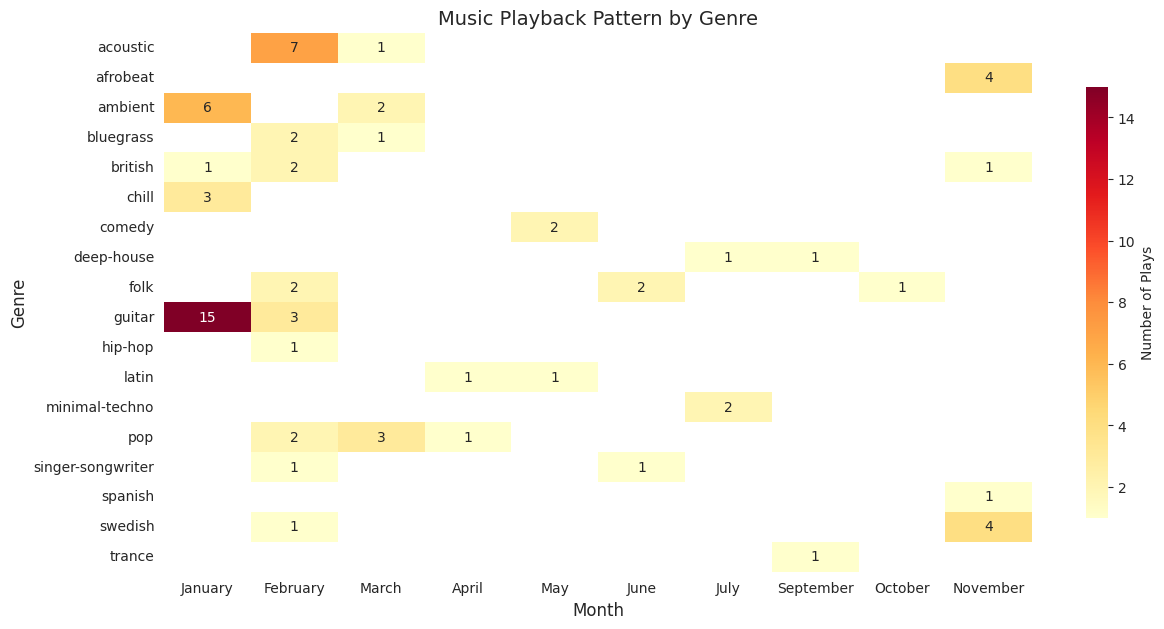

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Salin data untuk mencegah perubahan pada data asli
data_2023 = data_2023.copy()

# Buat kolom bulan
data_2023.loc[:, 'month'] = data_2023['play_time'].dt.strftime('%B')

# Urutkan bulan sesuai urutan kalender
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

# Buat pivot table dengan bulan sebagai sumbu X dan genre sebagai sumbu Y
heatmap_data = data_2023.pivot_table(index='track_genre', columns='month',
                                     values='track_name', aggfunc='count')

# Ambil hanya bulan yang ada dalam dataset agar tidak terjadi error
available_months = [month for month in month_order if month in heatmap_data.columns]
heatmap_data = heatmap_data[available_months]  # Urutkan berdasarkan bulan yang tersedia

# Ganti NaN dengan 0 dan ubah ke integer
heatmap_data_int = heatmap_data.fillna(0).astype(int)

# Buat mask untuk menyembunyikan nilai 0
mask = heatmap_data_int == 0

# Buat figure
plt.figure(figsize=(14, 7))
# Menghilangkan grid kotak-kotak
ax.grid(False)

# Membuat heatmap tanpa grid
ax = sns.heatmap(
    heatmap_data_int,
    cmap="YlOrRd",
    linewidths=0,  # **Menghilangkan garis antar kotak**
    annot=True,
    fmt="d",
    mask=mask,  # **Menyembunyikan nilai 0**
    cbar_kws={"shrink": 0.8, "label": "Number of Plays"}
)

# Label dan judul tetap ada
plt.xlabel("Month", fontsize=12)
plt.ylabel("Genre", fontsize=12)
plt.title("Music Playback Pattern by Genre", fontsize=14)
ax.grid(False)

# Tampilkan grafik
plt.show()



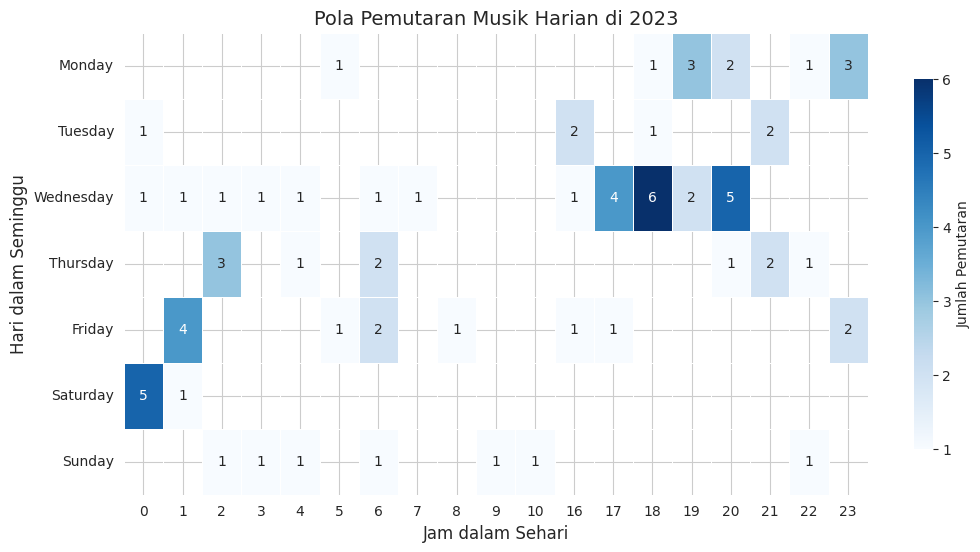

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Salin data untuk mencegah perubahan pada data asli
data_2023 = data_2023.copy()

# Buat kolom hari dan jam
data_2023.loc[:, 'day_of_week'] = data_2023['play_time'].dt.day_name()
data_2023.loc[:, 'hour'] = data_2023['play_time'].dt.hour

# Buat pivot table
heatmap_data = data_2023.pivot_table(index='day_of_week', columns='hour',
                                     values='track_name', aggfunc='count')

# Urutkan hari dalam seminggu
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
heatmap_data = heatmap_data.reindex(order)

# Ganti NaN dengan 0 dan ubah ke integer
heatmap_data_int = heatmap_data.fillna(0).astype(int)

# Buat mask untuk menyembunyikan nilai 0
mask = heatmap_data_int == 0

# Buat figure
plt.figure(figsize=(12, 6))

# Membuat heatmap dengan warna soft abu-abu ke biru
ax = sns.heatmap(
    heatmap_data_int,
    cmap="Blues",  # **Palet warna biru soft**
    linewidths=0.5,
    annot=True,
    fmt="d",
    mask=mask,  # **Menyembunyikan nilai 0**
    cbar_kws={"shrink": 0.8, "label": "Jumlah Pemutaran"}
)

# Label dan judul
plt.xlabel("Jam dalam Sehari", fontsize=12)
plt.ylabel("Hari dalam Seminggu", fontsize=12)
plt.title("Pola Pemutaran Musik Harian di 2023", fontsize=14)

# Tampilkan grafik
plt.show()


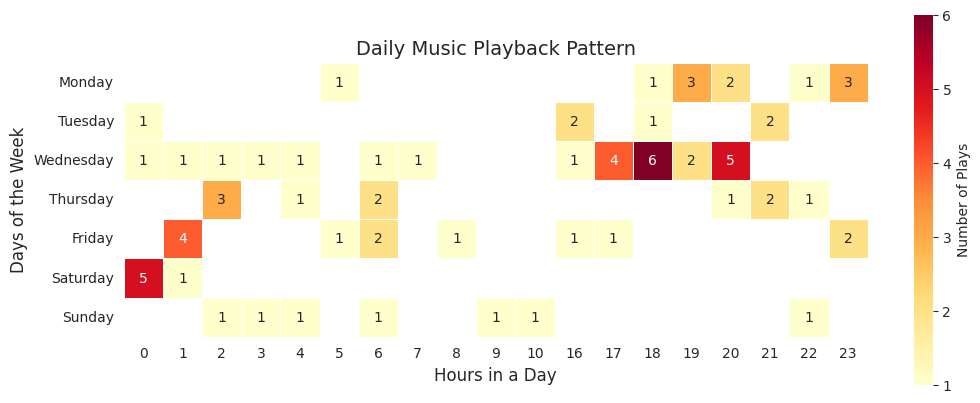

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Salin data untuk mencegah perubahan pada data asli
data_2023 = data_2023.copy()

# Buat kolom hari dan jam
data_2023.loc[:, 'day_of_week'] = data_2023['play_time'].dt.day_name()
data_2023.loc[:, 'hour'] = data_2023['play_time'].dt.hour

# Buat pivot table
heatmap_data = data_2023.pivot_table(index='day_of_week', columns='hour',
                                     values='track_name', aggfunc='count')

# Urutkan hari dalam seminggu
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
heatmap_data = heatmap_data.reindex(order)

# Ganti NaN dengan 0 dan ubah ke integer
heatmap_data_int = heatmap_data.fillna(0).astype(int)

# Buat mask untuk menyembunyikan nilai 0
mask = heatmap_data_int == 0

# Buat figure
plt.figure(figsize=(12, 6))

# Membuat heatmap dengan mask
ax = sns.heatmap(
    heatmap_data_int,
    cmap="YlOrRd",
    linewidths=0.5,
    annot=True,
    fmt="d",
    mask=mask,  # **Menyembunyikan nilai 0**
    cbar_kws={"shrink": 0.8, "label": "Number of Plays"},
    square=True  # Menjaga kotak tetap berbentuk kotak
)

# Menghilangkan grid tanpa menghapus label
ax.grid(False)  # Menghilangkan grid tanpa menghapus label

# Label dan judul
plt.xlabel("Hours in a Day", fontsize=12)
plt.ylabel("Days of the Week", fontsize=12)
plt.title("Daily Music Playback Pattern", fontsize=14)

# Tampilkan grafik
plt.show()


<Figure size 1000x600 with 0 Axes>

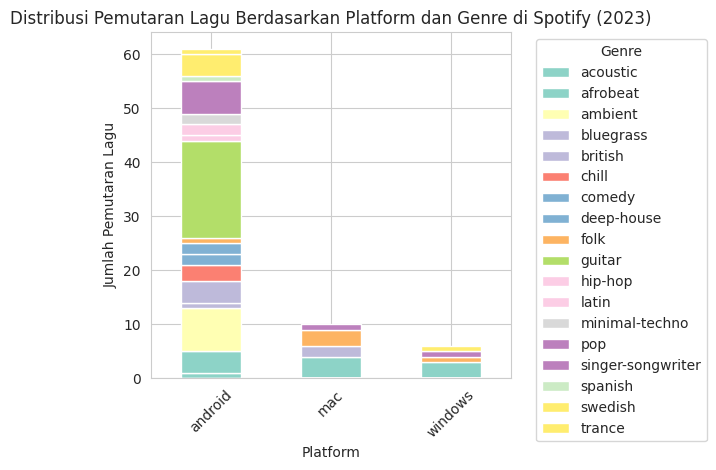

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan 'play_time' dalam format datetime
merged_df['play_time'] = pd.to_datetime(merged_df['play_time'])

# Filter data untuk tahun 2023
data_2023 = merged_df[merged_df['play_time'].dt.year == 2023]

# Hitung jumlah pemutaran lagu berdasarkan platform dan genre
platform_genre_counts = data_2023.groupby(['platform', 'track_genre']).size().unstack()

# Plot bar chart
plt.figure(figsize=(10, 6))
platform_genre_counts.plot(kind='bar', stacked=True, colormap='Set3')

# Menambahkan judul dan label
plt.title('Distribusi Pemutaran Lagu Berdasarkan Platform dan Genre di Spotify (2023)')
plt.xlabel('Platform')
plt.ylabel('Jumlah Pemutaran Lagu')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Tampilkan grafik
plt.show()


In [ ]:
# Menampilkan jenis platform yang ada di dataset
platforms_unique = merged_df['platform'].unique()

# Menampilkan hasil
print("Jenis platform yang ada di dataset:", platforms_unique)


Jenis platform yang ada di dataset: ['web player' 'windows' 'android' 'iOS' 'cast to device' 'mac']


<Figure size 1000x600 with 0 Axes>

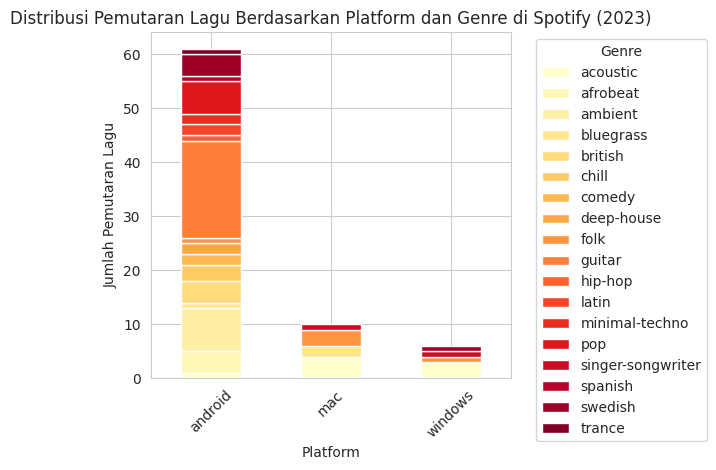

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Pastikan 'play_time' dalam format datetime
merged_df['play_time'] = pd.to_datetime(merged_df['play_time'])

# Filter data untuk tahun 2023
data_2023 = merged_df[merged_df['play_time'].dt.year == 2023]

# Hitung jumlah pemutaran lagu berdasarkan platform dan genre
platform_genre_counts = data_2023.groupby(['platform', 'track_genre']).size().unstack()

# Plot bar chart
plt.figure(figsize=(10, 6))

# Membuat colormap dari kuning ke merah (YlOrRd)
colors = plt.cm.YlOrRd(np.linspace(0, 1, len(platform_genre_counts.columns)))

platform_genre_counts.plot(kind='bar', stacked=True, color=colors)

# Menambahkan judul dan label
plt.title('Distribusi Pemutaran Lagu Berdasarkan Platform dan Genre di Spotify (2023)')
plt.xlabel('Platform')
plt.ylabel('Jumlah Pemutaran Lagu')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Tampilkan grafik
plt.show()


<Figure size 1000x600 with 0 Axes>

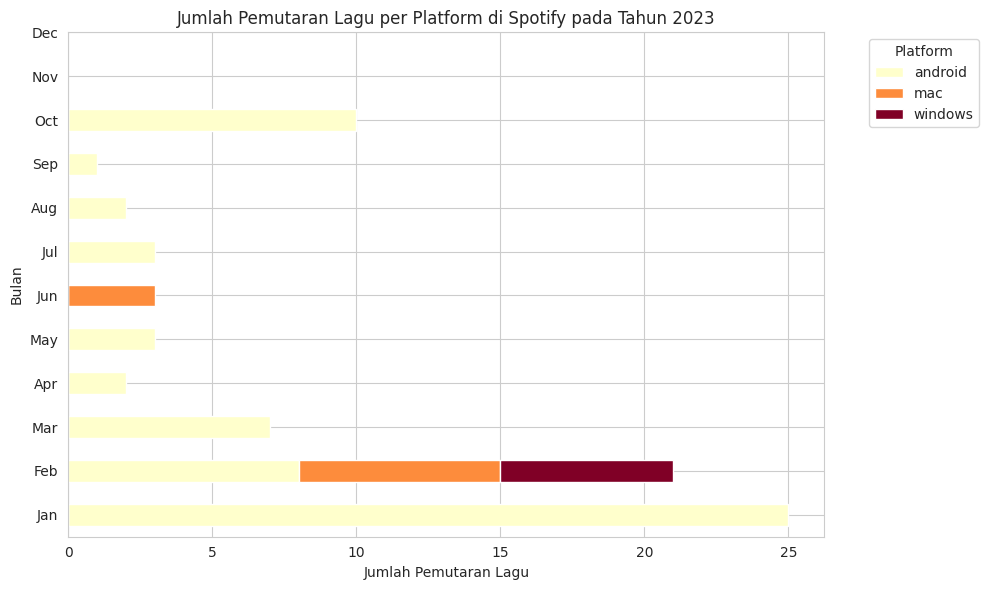

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan 'play_time' dalam format datetime
merged_df['play_time'] = pd.to_datetime(merged_df['play_time'])

# Filter data untuk tahun 2023
data_2023 = merged_df[merged_df['play_time'].dt.year == 2023]

# Hitung jumlah pemutaran lagu berdasarkan platform per bulan
platform_monthly_counts = data_2023.groupby([data_2023['play_time'].dt.month, 'platform']).size().unstack()

# Plot stacked bar chart (horizontal)
plt.figure(figsize=(10, 6))

# Plotkan stacked bar chart horizontal
platform_monthly_counts.plot(kind='barh', stacked=True, colormap='YlOrRd', figsize=(10, 6))

# Menambahkan judul dan label
plt.title('Jumlah Pemutaran Lagu per Platform di Spotify pada Tahun 2023')
plt.xlabel('Jumlah Pemutaran Lagu')
plt.ylabel('Bulan')
plt.yticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')

# Tampilkan grafik
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

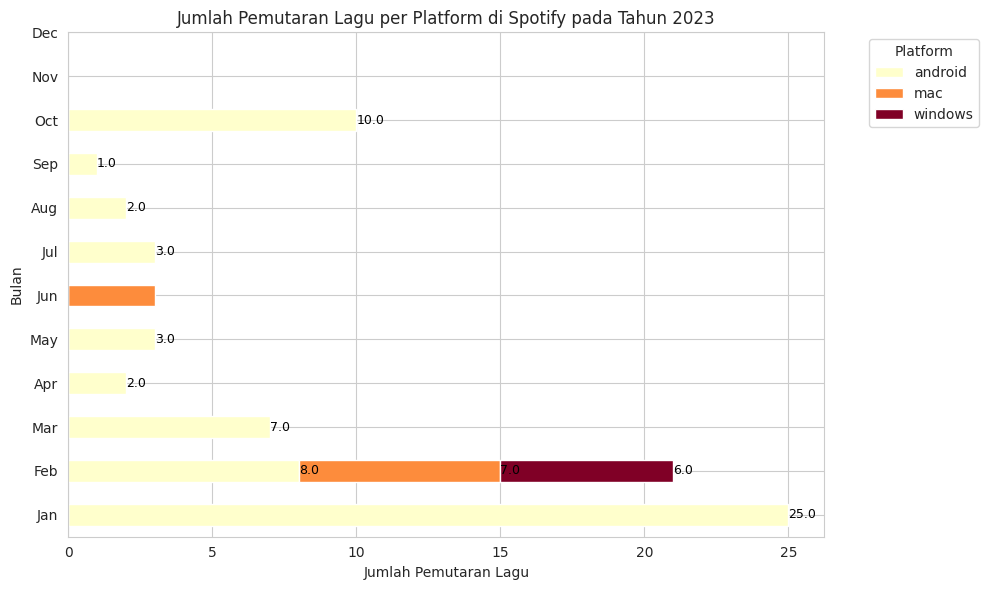

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan 'play_time' dalam format datetime
merged_df['play_time'] = pd.to_datetime(merged_df['play_time'])

# Filter data untuk tahun 2023
data_2023 = merged_df[merged_df['play_time'].dt.year == 2023]

# Hitung jumlah pemutaran lagu berdasarkan platform per bulan
platform_monthly_counts = data_2023.groupby([data_2023['play_time'].dt.month, 'platform']).size().unstack()

# Plot stacked bar chart (horizontal)
plt.figure(figsize=(10, 6))

# Plotkan stacked bar chart horizontal
ax = platform_monthly_counts.plot(kind='barh', stacked=True, colormap='YlOrRd', figsize=(10, 6))

# Menambahkan data label di setiap bagian stacked bar chart di sumbu X
for i, (month, row) in enumerate(platform_monthly_counts.iterrows()):
    cumulative_sum = 0
    for platform, count in row.items():  # Use items() instead of iteritems()
        cumulative_sum += count
        # Menambahkan label di ujung setiap bagian bar
        ax.text(cumulative_sum, i, str(count), va='center', ha='left', color='black', fontsize=9)

# Menambahkan judul dan label
plt.title('Jumlah Pemutaran Lagu per Platform di Spotify pada Tahun 2023')
plt.xlabel('Jumlah Pemutaran Lagu')
plt.ylabel('Bulan')
plt.yticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')

# Tampilkan grafik
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

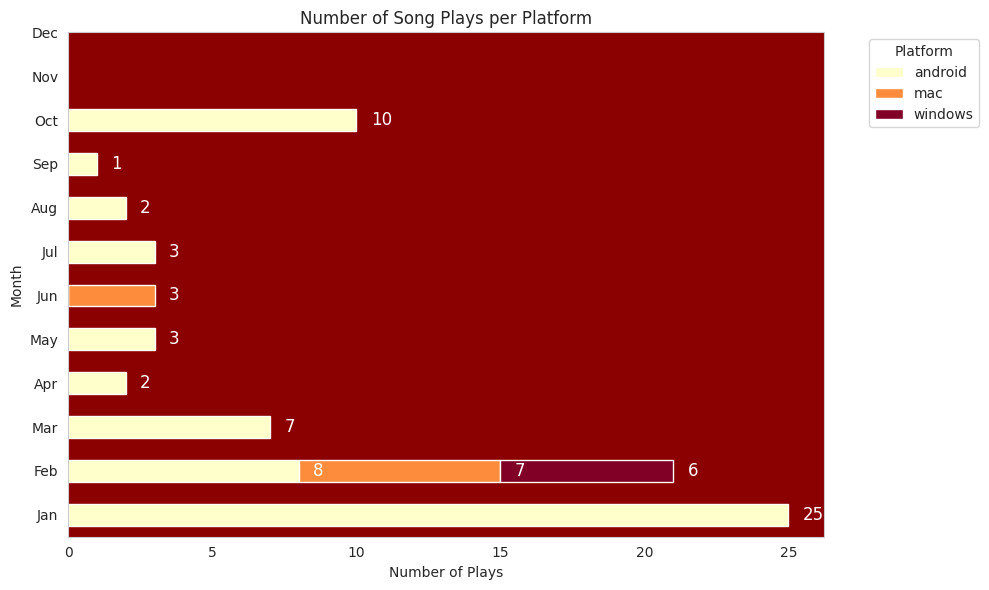

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Pastikan 'play_time' dalam format datetime
merged_df['play_time'] = pd.to_datetime(merged_df['play_time'])

# Filter data untuk tahun 2023
data_2023 = merged_df[merged_df['play_time'].dt.year == 2023]

# Hitung jumlah pemutaran lagu berdasarkan platform per bulan
platform_monthly_counts = data_2023.groupby([data_2023['play_time'].dt.month, 'platform']).size().unstack()

# Plot stacked bar chart (horizontal)
plt.figure(figsize=(10, 6))

# Plotkan stacked bar chart horizontal
ax = platform_monthly_counts.plot(kind='barh', stacked=True, colormap='YlOrRd', figsize=(10, 6))

# Mengubah warna latar belakang grafik
plt.gca().set_facecolor('Darkred')
# Menghilangkan grid kotak-kotak
ax.grid(False)

# Menambahkan data label di setiap bagian stacked bar chart di sumbu X
offset = 0.5
for i, (month, row) in enumerate(platform_monthly_counts.iterrows()):
    cumulative_sum = 0
    for platform, count in row.items():  # Use items() instead of iteritems()
        if pd.notna(count):  # Check if count is not NaN
            cumulative_sum += count
            # Menambahkan label di ujung setiap bagian bar sebagai integer
            ax.text(cumulative_sum + offset, i, str(int(count)), va='center', ha='left', color='white', fontsize=12)

# Menambahkan judul dan label
plt.title('Number of Song Plays per Platform')
plt.xlabel('Number of Plays')
plt.ylabel('Month')
plt.yticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')

# Tampilkan grafik
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

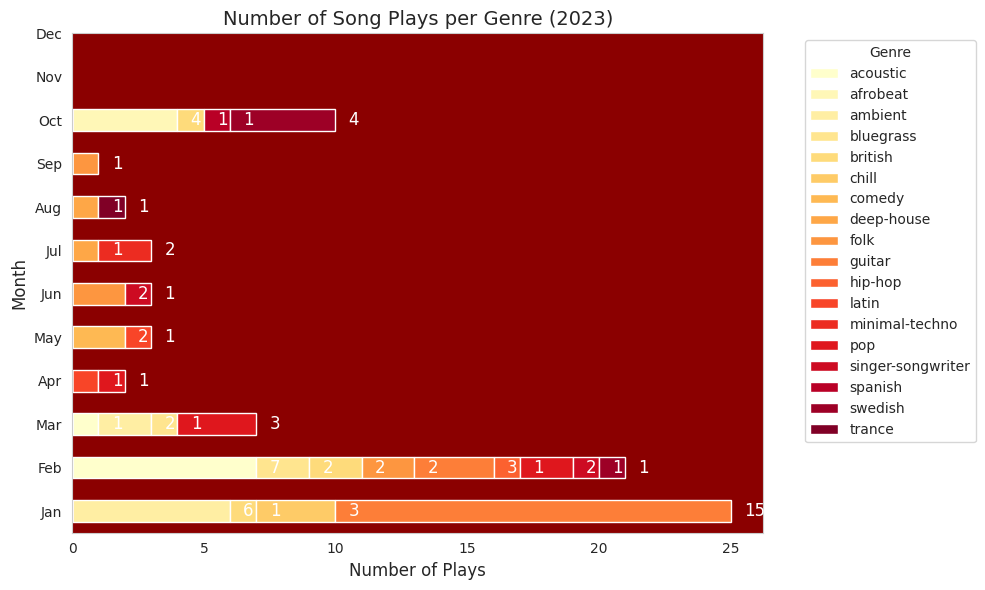

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Pastikan 'play_time' dalam format datetime
merged_df['play_time'] = pd.to_datetime(merged_df['play_time'])

# Filter data untuk tahun 2023
data_2023 = merged_df[merged_df['play_time'].dt.year == 2023]

# Hitung jumlah pemutaran lagu berdasarkan genre per bulan
genre_monthly_counts = data_2023.groupby([data_2023['play_time'].dt.month, 'track_genre']).size().unstack()

# Plot stacked bar chart (horizontal)
plt.figure(figsize=(10, 6))

# Plotkan stacked bar chart horizontal berdasarkan genre
ax = genre_monthly_counts.plot(kind='barh', stacked=True, colormap='YlOrRd', figsize=(10, 6))

# Menghilangkan grid kotak-kotak
ax.grid(False)
# Mengubah warna latar belakang grafik
plt.gca().set_facecolor('Darkred')

# Menambahkan data label di setiap bagian stacked bar chart di sumbu X
offset = 0.5
for i, (month, row) in enumerate(genre_monthly_counts.iterrows()):
    cumulative_sum = 0
    for genre, count in row.items():  # Gunakan items() agar kompatibel
        if pd.notna(count):  # Pastikan tidak ada nilai NaN
            cumulative_sum += count
            # Menambahkan label di ujung setiap bagian bar
            ax.text(cumulative_sum + offset, i, str(int(count)), va='center', ha='left', color='white', fontsize=12)

# Menambahkan judul dan label
plt.title('Number of Song Plays per Genre (2023)', fontsize=14)
plt.xlabel('Number of Plays', fontsize=12)
plt.ylabel('Month', fontsize=12)
plt.yticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

# Tampilkan grafik
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

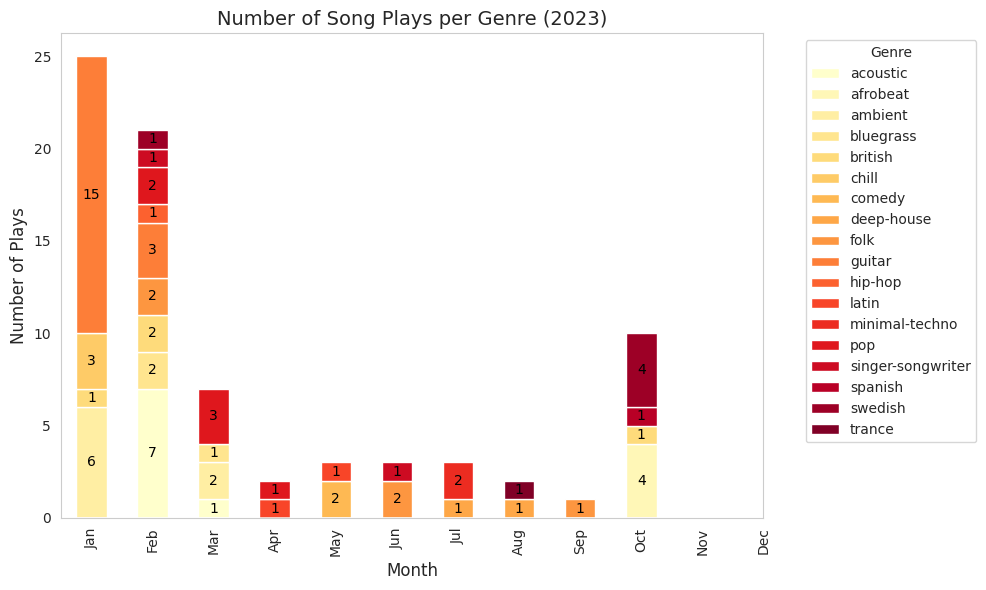

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Pastikan 'play_time' dalam format datetime
merged_df['play_time'] = pd.to_datetime(merged_df['play_time'])

# Filter data untuk tahun 2023
data_2023 = merged_df[merged_df['play_time'].dt.year == 2023]

# Hitung jumlah pemutaran lagu berdasarkan genre per bulan
genre_monthly_counts = data_2023.groupby([data_2023['play_time'].dt.month, 'track_genre']).size().unstack()

# Plot stacked bar chart (vertikal ke atas)
plt.figure(figsize=(10, 6))
ax = genre_monthly_counts.plot(kind='bar', stacked=True, colormap='YlOrRd', figsize=(10, 6))

# Menghilangkan grid kotak-kotak
ax.grid(False)

# Menambahkan label jumlah pemutaran di tengah setiap bagian batang
for i, (month, row) in enumerate(genre_monthly_counts.iterrows()):
    cumulative_sum = 0
    for genre, count in row.items():
        if pd.notna(count):
            bar_height = count / 2  # Posisikan label di tengah batang
            cumulative_sum += count
            ax.text(i, cumulative_sum - bar_height, str(int(count)), ha='center', va='center', color='black', fontsize=10)

# Menambahkan judul dan label
plt.title('Number of Song Plays per Genre (2023)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Plays', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

# Tampilkan grafik
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

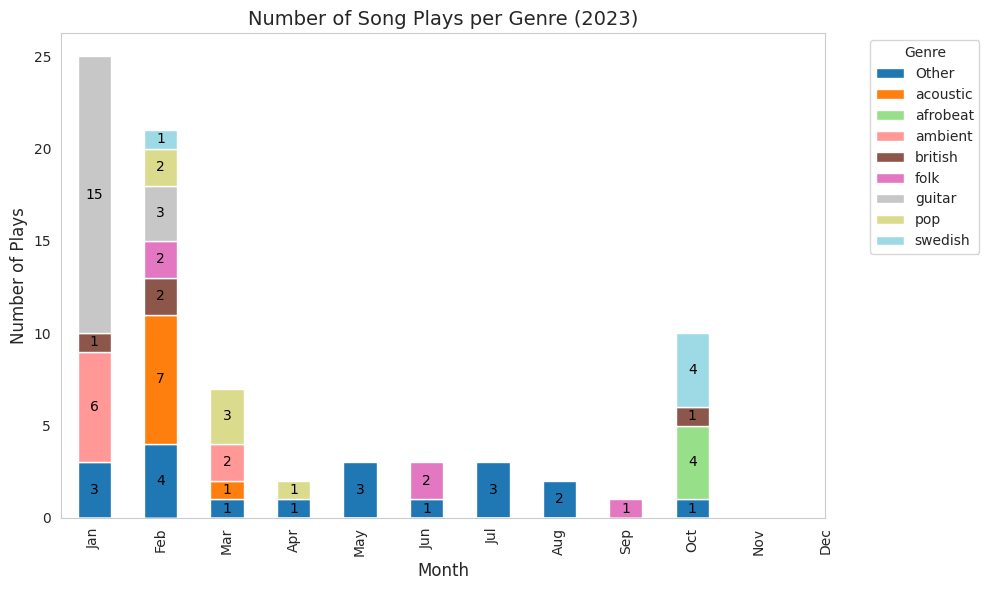

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Pastikan 'play_time' dalam format datetime
merged_df['play_time'] = pd.to_datetime(merged_df['play_time'])

# Filter data untuk tahun 2023
data_2023 = merged_df[merged_df['play_time'].dt.year == 2023].copy()  # Gunakan copy() agar tidak kena SettingWithCopyWarning

# Hitung jumlah pemutaran per genre
genre_counts = data_2023['track_genre'].value_counts()

# Ambil 8 genre teratas, lainnya dikelompokkan sebagai "Other"
top_genres = genre_counts.nlargest(8).index  # Ganti angka ini jika ingin lebih/kurang banyak genre utama
data_2023.loc[:, 'track_genre'] = data_2023['track_genre'].apply(lambda x: x if x in top_genres else 'Other')

# Hitung jumlah pemutaran lagu berdasarkan genre per bulan
genre_monthly_counts = data_2023.groupby([data_2023['play_time'].dt.month, 'track_genre']).size().unstack()

# Plot stacked bar chart dengan colormap yang lebih beragam
plt.figure(figsize=(10, 6))
ax = genre_monthly_counts.plot(kind='bar', stacked=True, cmap='tab20', figsize=(10, 6))

# Menghilangkan grid
ax.grid(False)

# Menambahkan label jumlah pemutaran di tengah setiap batang
for i, (month, row) in enumerate(genre_monthly_counts.iterrows()):
    cumulative_sum = 0
    for genre, count in row.items():
        if pd.notna(count):
            bar_height = count / 2  # Posisikan label di tengah batang
            cumulative_sum += count
            ax.text(i, cumulative_sum - bar_height, str(int(count)), ha='center', va='center', color='black', fontsize=10)

# Menambahkan judul dan label
plt.title('Number of Song Plays per Genre (2023)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Plays', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Menampilkan legend yang lebih sederhana
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

# Tampilkan grafik
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

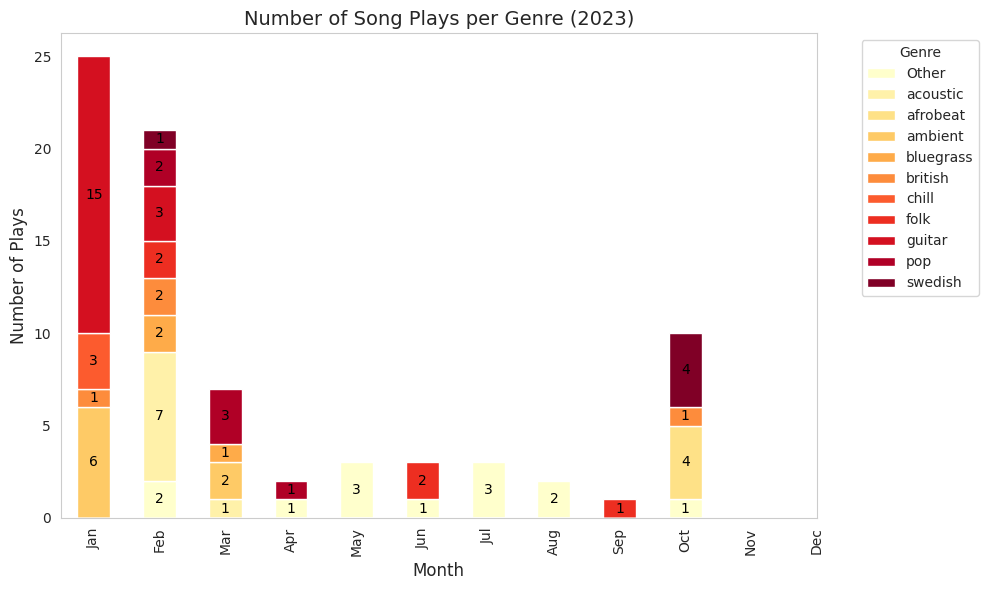

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Pastikan 'play_time' dalam format datetime
merged_df['play_time'] = pd.to_datetime(merged_df['play_time'])

# Filter data untuk tahun 2023
data_2023 = merged_df[merged_df['play_time'].dt.year == 2023].copy()  # Copy untuk menghindari SettingWithCopyWarning

# Hitung jumlah pemutaran per genre
genre_counts = data_2023['track_genre'].value_counts()

# Ambil 10 genre teratas, lainnya dikelompokkan sebagai "Other"
top_genres = genre_counts.nlargest(10).index
data_2023.loc[:, 'track_genre'] = data_2023['track_genre'].apply(lambda x: x if x in top_genres else 'Other')

# Hitung jumlah pemutaran lagu berdasarkan genre per bulan
genre_monthly_counts = data_2023.groupby([data_2023['play_time'].dt.month, 'track_genre']).size().unstack()

# Periksa apakah data kosong sebelum plotting
if not genre_monthly_counts.empty:
    # Plot stacked bar chart (vertikal ke atas)
    plt.figure(figsize=(10, 6))
    ax = genre_monthly_counts.plot(kind='bar', stacked=True, colormap='YlOrRd', figsize=(10, 6))

    # Menghilangkan grid
    ax.grid(False)

    # Menambahkan label jumlah pemutaran di tengah setiap batang
    for i, (month, row) in enumerate(genre_monthly_counts.iterrows()):
        cumulative_sum = 0
        for genre, count in row.items():
            if pd.notna(count):
                bar_height = count / 2  # Posisikan label di tengah batang
                cumulative_sum += count
                ax.text(i, cumulative_sum - bar_height, str(int(count)), ha='center', va='center', color='black', fontsize=10)

    # Menambahkan judul dan label
    plt.title('Number of Song Plays per Genre (2023)', fontsize=14)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Number of Plays', fontsize=12)
    plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

    # Perbaiki legenda agar tidak terlalu panjang
    plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

    # Tampilkan grafik
    plt.tight_layout()
    plt.show()
else:
    print("Data kosong setelah filtering.")


<ipython-input-64-1f270c3c9388>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='play_mode', y='play_count', data=play_counts, ax=axes[0], palette='pastel')
<ipython-input-64-1f270c3c9388>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='play_mode', y='ms_played', data=play_duration, ax=axes[1], palette='pastel')


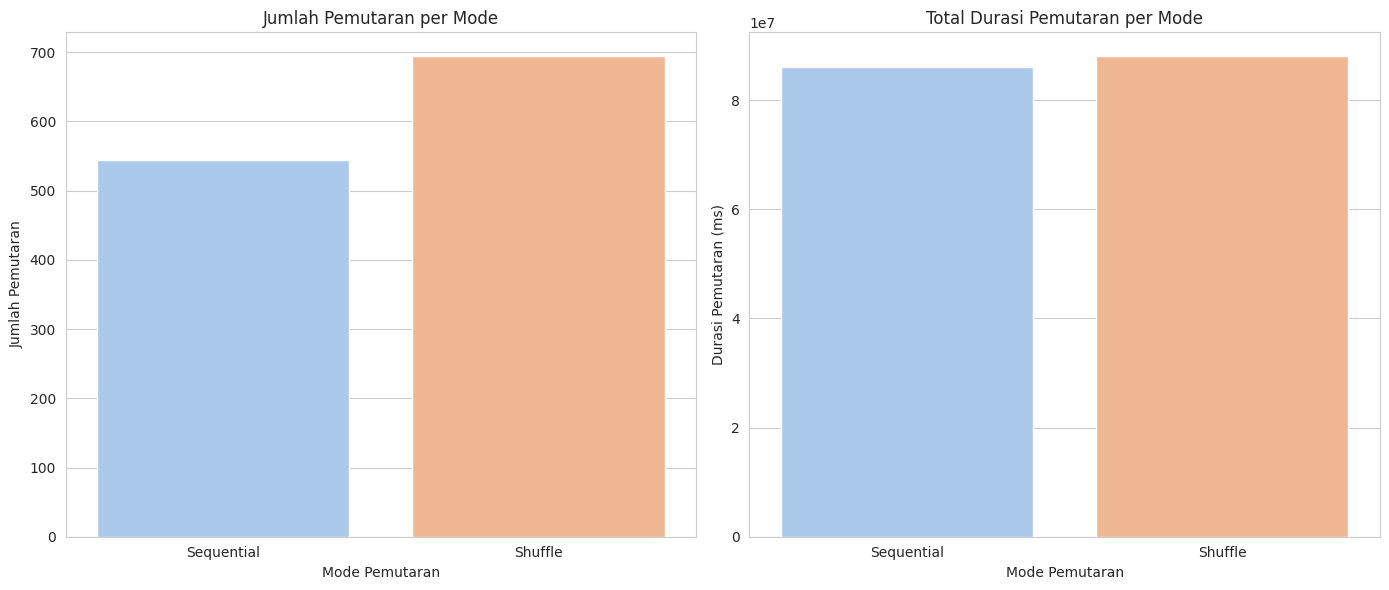

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Misalkan 'data' adalah DataFrame asli yang sudah ada
# Asumsikan kolom 'shuffle' berisi nilai boolean: True untuk mode shuffle, False untuk pemutaran urut

# Jika perlu, buat kolom baru untuk label mode pemutaran
merged_df['play_mode'] = merged_df['shuffle'].map({True: 'Shuffle', False: 'Sequential'})

# 1. Hitung jumlah pemutaran (frekuensi) per mode
play_counts = merged_df.groupby('play_mode').size().reset_index(name='play_count')

# 2. Hitung total durasi pemutaran per mode (misalnya, ms_played)
play_duration = merged_df.groupby('play_mode')['ms_played'].sum().reset_index()

# Buat figure dengan dua subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart untuk jumlah pemutaran
sns.barplot(x='play_mode', y='play_count', data=play_counts, ax=axes[0], palette='pastel')
axes[0].set_title("Jumlah Pemutaran per Mode")
axes[0].set_xlabel("Mode Pemutaran")
axes[0].set_ylabel("Jumlah Pemutaran")

# Bar chart untuk total durasi pemutaran
sns.barplot(x='play_mode', y='ms_played', data=play_duration, ax=axes[1], palette='pastel')
axes[1].set_title("Total Durasi Pemutaran per Mode")
axes[1].set_xlabel("Mode Pemutaran")
axes[1].set_ylabel("Durasi Pemutaran (ms)")

plt.tight_layout()
plt.show()


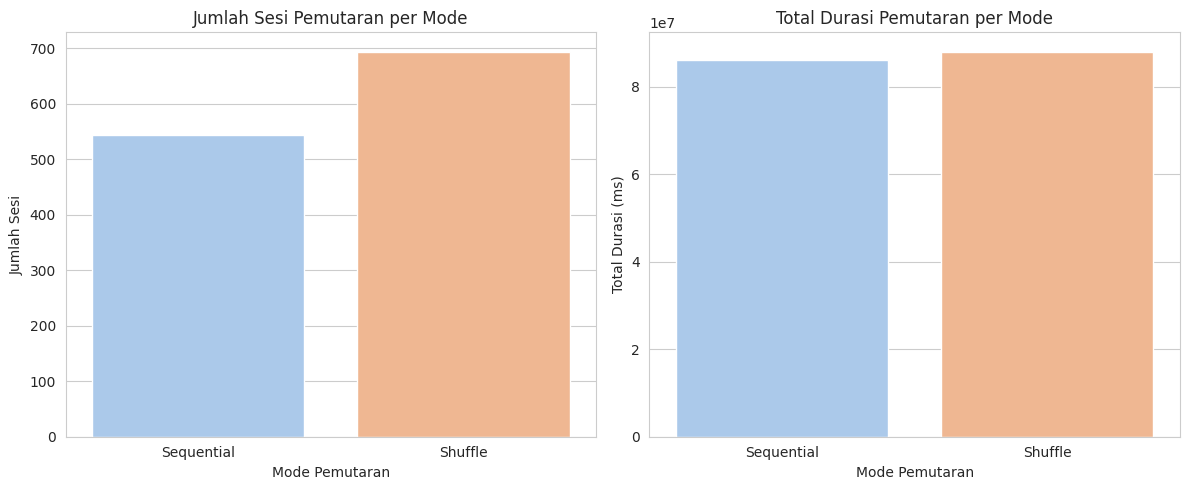

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Contoh: misalkan 'data' sudah didefinisikan, dan kolom 'play_time' diparse sebagai datetime
# Jika belum, Anda dapat mengimpor data dan memparsenya terlebih dahulu.

# Membuat kolom 'play_mode' berdasarkan kolom 'shuffle'
merged_df['play_mode'] = merged_df['shuffle'].map({True: 'Shuffle', False: 'Sequential'})

# 1. Hitung frekuensi pemutaran (jumlah sesi) per mode
play_counts = merged_df.groupby('play_mode').size().reset_index(name='play_count')

# 2. Hitung total durasi pemutaran per mode (misalnya, ms_played)
play_duration = merged_df.groupby('play_mode')['ms_played'].sum().reset_index()

# Buat figure dengan dua subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart untuk jumlah sesi (frekuensi pemutaran)
ax0 = sns.barplot(x='play_mode', y='play_count', data=play_counts,
                  hue='play_mode', dodge=False, palette='pastel', ax=axes[0])
# Nonaktifkan legend
if ax0.get_legend():
    ax0.get_legend().remove()
axes[0].set_title("Jumlah Sesi Pemutaran per Mode")
axes[0].set_xlabel("Mode Pemutaran")
axes[0].set_ylabel("Jumlah Sesi")

# Bar chart untuk total durasi pemutaran
ax1 = sns.barplot(x='play_mode', y='ms_played', data=play_duration,
                  hue='play_mode', dodge=False, palette='pastel', ax=axes[1])
# Nonaktifkan legend
if ax1.get_legend():
    ax1.get_legend().remove()
axes[1].set_title("Total Durasi Pemutaran per Mode")
axes[1].set_xlabel("Mode Pemutaran")
axes[1].set_ylabel("Total Durasi (ms)")

plt.tight_layout()
plt.show()


<ipython-input-66-7ce6d4e76d3d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2023['play_mode'] = data_2023['shuffle'].map({True: 'Shuffle', False: 'Sequential'})
<ipython-input-66-7ce6d4e76d3d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2023['date'] = data_2023['play_time'].dt.date


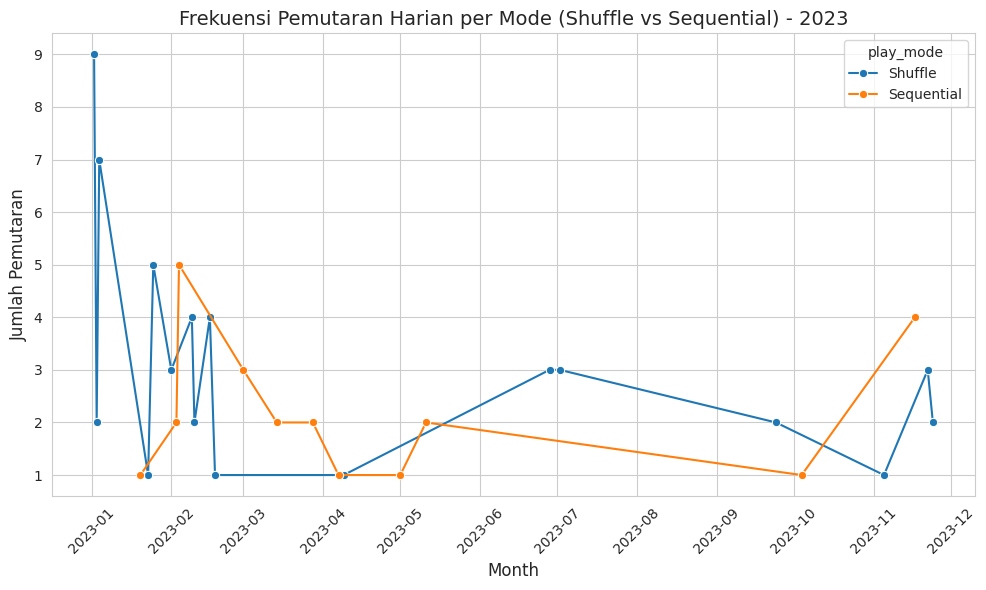

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan 'data' sudah ada dan 'play_time' diparse sebagai datetime.
merged_df = merged_df.copy()

# Filter hanya untuk tahun 2023
data_2023 = merged_df[merged_df['play_time'].dt.year == 2023]

# Buat kolom 'play_mode' berdasarkan kolom 'shuffle'
data_2023['play_mode'] = data_2023['shuffle'].map({True: 'Shuffle', False: 'Sequential'})

# Buat kolom 'date' dari 'play_time' (hanya tanggal, tanpa waktu)
data_2023['date'] = data_2023['play_time'].dt.date

# Agregasi data: hitung jumlah pemutaran (session) per hari untuk masing-masing mode
daily_counts = data_2023.groupby(['date', 'play_mode']).size().reset_index(name='play_count')

# Buat line chart dengan seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=daily_counts, x='date', y='play_count', hue='play_mode', marker='o')

# Atur label sumbu dan judul
plt.xlabel("Month", fontsize=12)
plt.ylabel("Jumlah Pemutaran", fontsize=12)
plt.title("Frekuensi Pemutaran Harian per Mode (Shuffle vs Sequential) - 2023", fontsize=14)

# Rotasi label sumbu X agar mudah dibaca
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


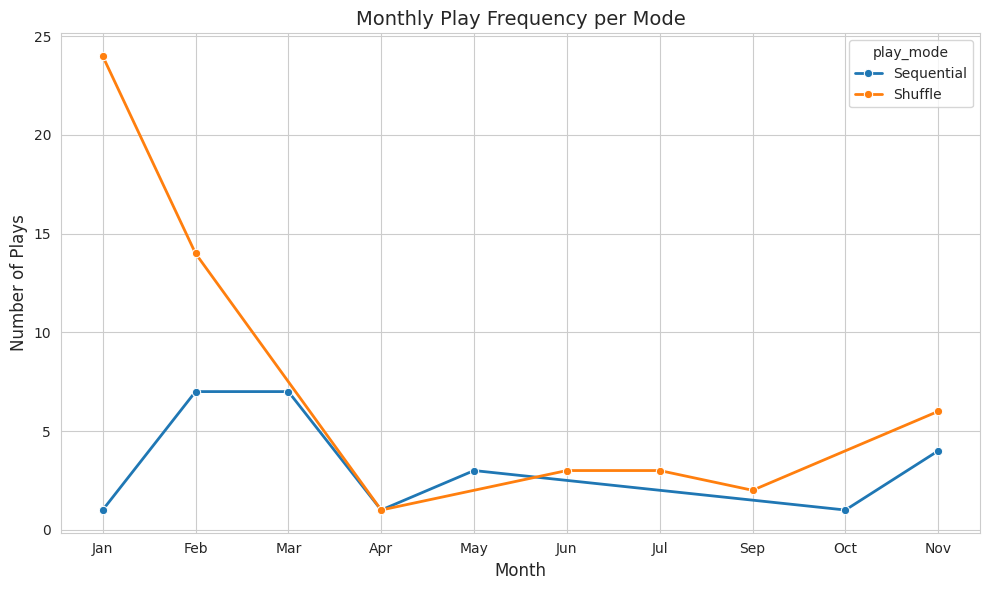

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan 'data' sudah ada dan 'play_time' diparse sebagai datetime.
merged_df = merged_df.copy()

# Filter hanya untuk tahun 2023 dan gunakan .copy() untuk menghindari warning
data_2023 = merged_df[merged_df['play_time'].dt.year == 2023].copy()

# Buat kolom 'play_mode' berdasarkan kolom 'shuffle' menggunakan .loc
data_2023.loc[:, 'play_mode'] = data_2023['shuffle'].map({True: 'Shuffle', False: 'Sequential'})

# Buat kolom 'month' dari 'play_time' (hanya bulan)
data_2023.loc[:, 'month'] = data_2023['play_time'].dt.month

# Agregasi data: hitung jumlah pemutaran (session) per bulan untuk masing-masing mode
monthly_counts = data_2023.groupby(['month', 'play_mode']).size().reset_index(name='play_count')

# Mapping angka bulan ke nama bulan
month_labels = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Des'}
monthly_counts['month_name'] = monthly_counts['month'].map(month_labels)

# Buat line chart dengan seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_counts, x='month_name', y='play_count', hue='play_mode', marker='o', linewidth=2)

# Atur label sumbu dan judul
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Plays", fontsize=12)
plt.title("Monthly Play Frequency per Mode", fontsize=14)

# Atur sumbu X agar label bulan sejajar (tidak miring)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


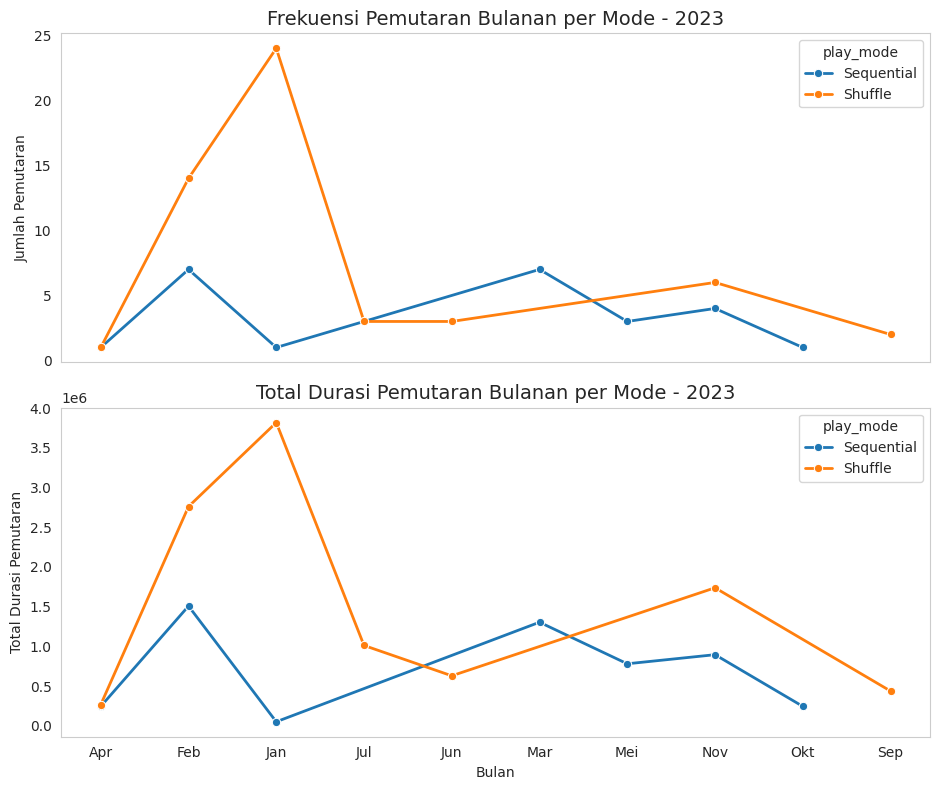

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan 'merged_df' sudah ada dan 'play_time' diparse sebagai datetime.
merged_df = merged_df.copy()

# Filter hanya untuk tahun 2023 dan gunakan .copy() untuk menghindari warning
data_2023 = merged_df[merged_df['play_time'].dt.year == 2023].copy()

# Buat kolom 'play_mode' berdasarkan kolom 'shuffle'
data_2023.loc[:, 'play_mode'] = data_2023['shuffle'].map({True: 'Shuffle', False: 'Sequential'})

# Buat kolom 'month' dari 'play_time' (hanya bulan)
data_2023.loc[:, 'month'] = data_2023['play_time'].dt.month

# Mapping angka bulan ke nama bulan
month_labels = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'Mei', 6: 'Jun',
                7: 'Jul', 8: 'Agu', 9: 'Sep', 10: 'Okt', 11: 'Nov', 12: 'Des'}
data_2023.loc[:, 'month_name'] = data_2023['month'].map(month_labels)

# Agregasi data: hitung jumlah pemutaran per bulan dan total durasi per bulan
monthly_stats = data_2023.groupby(['month_name', 'play_mode']).agg(
    play_count=('play_mode', 'count'),  # Hitung jumlah pemutaran
    total_duration=('ms_played', 'sum')  # Hitung total durasi (asumsikan durasi dalam detik/menit)
).reset_index()

# Buat figure dengan 2 subplot
fig, axes = plt.subplots(2, 1, figsize=(9.5, 8), sharex=True)

# Plot jumlah pemutaran
sns.lineplot(data=monthly_stats, x='month_name', y='play_count', hue='play_mode', marker='o', linewidth=2, ax=axes[0])
axes[0].set_title("Frekuensi Pemutaran Bulanan per Mode - 2023", fontsize=14)
axes[0].set_ylabel("Jumlah Pemutaran")
axes[0].grid(False)

# Plot total durasi pemutaran
sns.lineplot(data=monthly_stats, x='month_name', y='total_duration', hue='play_mode', marker='o', linewidth=2, ax=axes[1])
axes[1].set_title("Total Durasi Pemutaran Bulanan per Mode - 2023", fontsize=14)
axes[1].set_ylabel("Total Durasi Pemutaran")
axes[1].grid(False)

# Atur label sumbu X agar sejajar
plt.xticks(rotation=0)
plt.xlabel("Bulan")

plt.tight_layout()
plt.show()


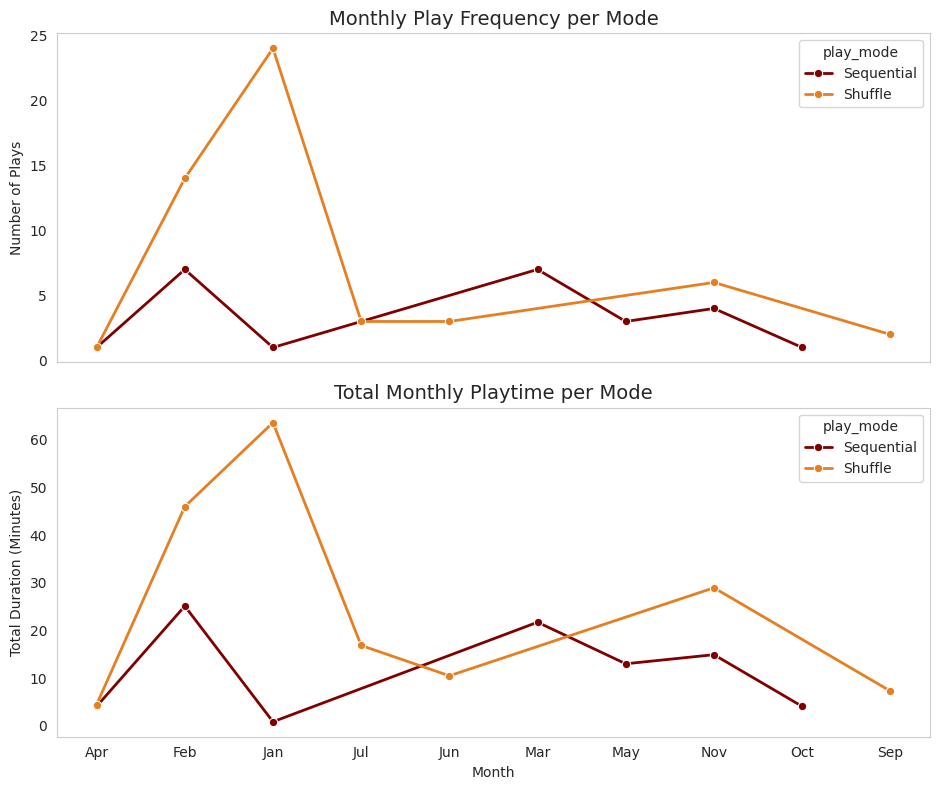

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan 'merged_df' sudah ada dan 'play_time' diparse sebagai datetime.
merged_df = merged_df.copy()

# Filter hanya untuk tahun 2023 dan gunakan .copy() untuk menghindari warning
data_2023 = merged_df[merged_df['play_time'].dt.year == 2023].copy()

# Buat kolom 'play_mode' berdasarkan kolom 'shuffle'
data_2023.loc[:, 'play_mode'] = data_2023['shuffle'].map({True: 'Shuffle', False: 'Sequential'})

# Buat kolom 'month' dari 'play_time' (hanya bulan)
data_2023.loc[:, 'month'] = data_2023['play_time'].dt.month

# Mapping angka bulan ke nama bulan
month_labels = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Des'}
data_2023.loc[:, 'month_name'] = data_2023['month'].map(month_labels)

# Agregasi data: hitung jumlah pemutaran per bulan dan total durasi per bulan
monthly_stats = data_2023.groupby(['month_name', 'play_mode']).agg(
    play_count=('play_mode', 'count'),  # Hitung jumlah pemutaran
    total_duration=('ms_played', 'sum')  # Total durasi dalam milidetik
).reset_index()

# Konversi total durasi dari milidetik ke menit
monthly_stats['total_duration_min'] = monthly_stats['total_duration'] / (1000 * 60)

custom_palette = {"Shuffle": "#E67E22", "Sequential": "#800000"}
# Buat figure dengan 2 subplot
fig, axes = plt.subplots(2, 1, figsize=(9.5, 8), sharex=True)

# Plot jumlah pemutaran
sns.lineplot(data=monthly_stats, x='month_name', y='play_count', hue='play_mode', marker='o', linewidth=2, ax=axes[0], palette=custom_palette)
axes[0].set_title("Monthly Play Frequency per Mode", fontsize=14)
axes[0].set_ylabel("Number of Plays")
axes[0].grid(False)

# Plot total durasi pemutaran dalam menit
sns.lineplot(data=monthly_stats, x='month_name', y='total_duration_min', hue='play_mode', marker='o', linewidth=2, ax=axes[1], palette=custom_palette)
axes[1].set_title("Total Monthly Playtime per Mode", fontsize=14)
axes[1].set_ylabel("Total Duration (Minutes)")
axes[1].grid(False)

# Atur label sumbu X agar sejajar
plt.xticks(rotation=0)
plt.xlabel("Month")

plt.tight_layout()
plt.show()


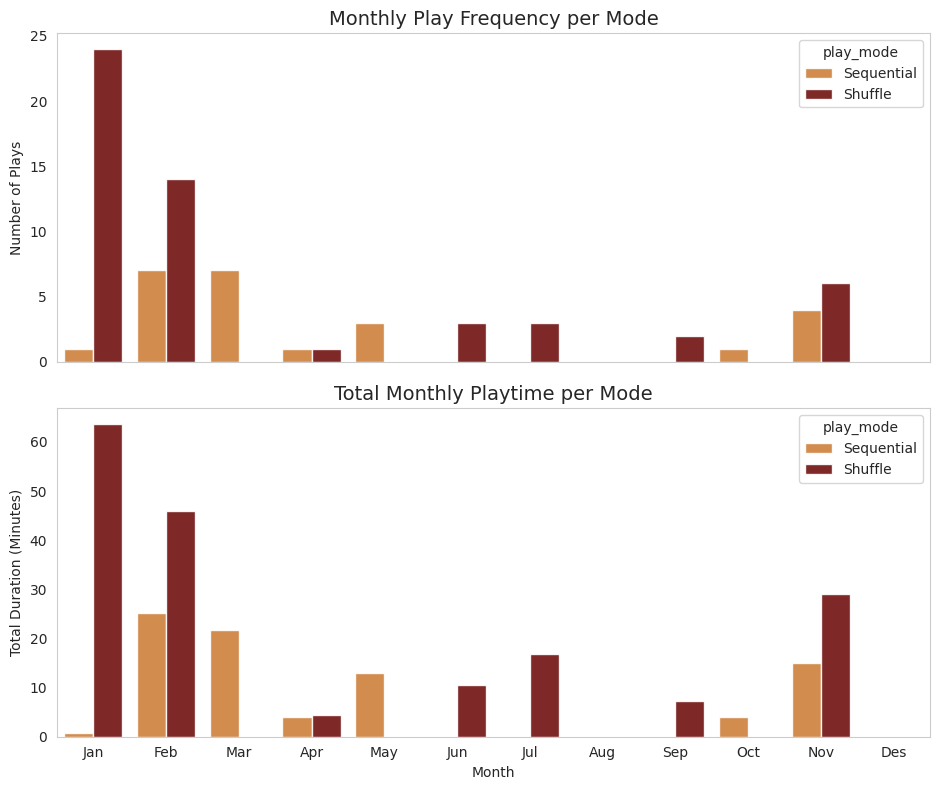

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan 'merged_df' sudah ada dan 'play_time' diparse sebagai datetime.
merged_df = merged_df.copy()

# Filter hanya untuk tahun 2023 dan gunakan .copy() untuk menghindari warning
data_2023 = merged_df[merged_df['play_time'].dt.year == 2023].copy()

# Buat kolom 'play_mode' berdasarkan kolom 'shuffle'
data_2023.loc[:, 'play_mode'] = data_2023['shuffle'].map({True: 'Shuffle', False: 'Sequential'})

# Buat kolom 'month' dari 'play_time' (hanya bulan)
data_2023.loc[:, 'month'] = data_2023['play_time'].dt.month

# Mapping angka bulan ke nama bulan
month_labels = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Des'}
data_2023.loc[:, 'month_name'] = data_2023['month'].map(month_labels)

# Urutkan bulan secara kronologis
data_2023['month_name'] = pd.Categorical(data_2023['month_name'],
                                         categories=list(month_labels.values()),
                                         ordered=True)

# Agregasi data: hitung jumlah pemutaran per bulan dan total durasi per bulan
monthly_stats = data_2023.groupby(['month_name', 'play_mode'], observed=False).agg(
    play_count=('play_mode', 'count'),  # Hitung jumlah pemutaran
    total_duration=('ms_played', 'sum')  # Total durasi dalam milidetik
).reset_index()

# Konversi total durasi dari milidetik ke menit
monthly_stats['total_duration_min'] = monthly_stats['total_duration'] / (1000 * 60)

# Urutkan kembali berdasarkan kategori bulan
monthly_stats = monthly_stats.sort_values('month_name')

# Custom color mapping
custom_palette = {"Sequential": "#E67E22", "Shuffle": "#800000"}

# Buat figure dengan 2 subplot
fig, axes = plt.subplots(2, 1, figsize=(9.5, 8), sharex=True)

# Plot jumlah pemutaran menggunakan bar plot
sns.barplot(data=monthly_stats, x='month_name', y='play_count', hue='play_mode',
            ax=axes[0], palette=custom_palette, alpha=0.9)
axes[0].set_title("Monthly Play Frequency per Mode", fontsize=14)
axes[0].set_ylabel("Number of Plays")
axes[0].grid(False)

# Plot total durasi pemutaran dalam menit menggunakan bar plot
sns.barplot(data=monthly_stats, x='month_name', y='total_duration_min', hue='play_mode',
            ax=axes[1], palette=custom_palette, alpha=0.9)
axes[1].set_title("Total Monthly Playtime per Mode", fontsize=14)
axes[1].set_ylabel("Total Duration (Minutes)")
axes[1].grid(False)

# Atur label sumbu X agar sejajar
plt.xticks(rotation=0)
plt.xlabel("Month")

plt.tight_layout()
plt.show()


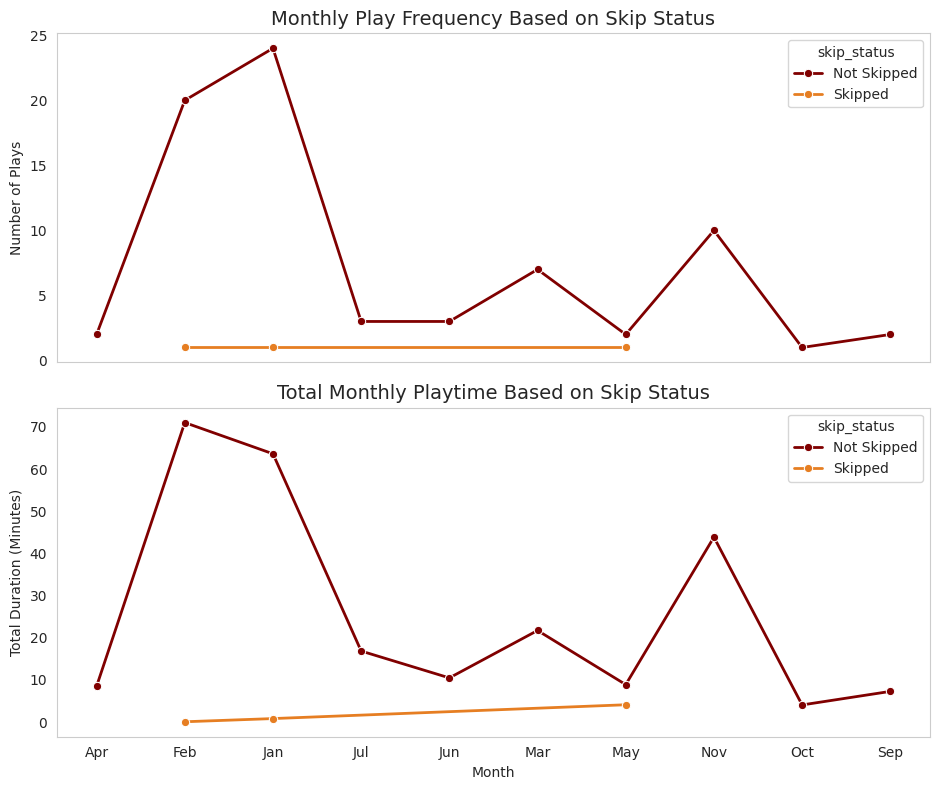

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan 'merged_df' sudah ada dan 'play_time' diparse sebagai datetime.
merged_df = merged_df.copy()

# Filter hanya untuk tahun 2023 dan gunakan .copy() untuk menghindari warning
data_2023 = merged_df[merged_df['play_time'].dt.year == 2023].copy()

# Buat kolom 'skip_status' berdasarkan apakah lagu di-skip atau tidak
data_2023.loc[:, 'skip_status'] = data_2023['skipped'].map({True: 'Skipped', False: 'Not Skipped'})

# Buat kolom 'month' dari 'play_time' (hanya bulan)
data_2023.loc[:, 'month'] = data_2023['play_time'].dt.month

# Mapping angka bulan ke nama bulan
month_labels = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
data_2023.loc[:, 'month_name'] = data_2023['month'].map(month_labels)

# Agregasi data: hitung jumlah pemutaran per bulan dan total durasi per bulan berdasarkan skip status
monthly_stats = data_2023.groupby(['month_name', 'skip_status']).agg(
    play_count=('skip_status', 'count'),  # Hitung jumlah pemutaran
    total_duration=('ms_played', 'sum')  # Total durasi dalam milidetik
).reset_index()

# Konversi total durasi dari milidetik ke menit
monthly_stats['total_duration_min'] = monthly_stats['total_duration'] / (1000 * 60)

# Custom color mapping
custom_palette = {"Skipped": "#E67E22", "Not Skipped": "#800000"}

# Buat figure dengan 2 subplot
fig, axes = plt.subplots(2, 1, figsize=(9.5, 8), sharex=True)

# Plot jumlah pemutaran berdasarkan skip status
sns.lineplot(data=monthly_stats, x='month_name', y='play_count', hue='skip_status',
             marker='o', linewidth=2, ax=axes[0], palette=custom_palette)
axes[0].set_title("Monthly Play Frequency Based on Skip Status", fontsize=14)
axes[0].set_ylabel("Number of Plays")
axes[0].grid(False)

# Plot total durasi pemutaran dalam menit berdasarkan skip status
sns.lineplot(data=monthly_stats, x='month_name', y='total_duration_min', hue='skip_status',
             marker='o', linewidth=2, ax=axes[1], palette=custom_palette)
axes[1].set_title("Total Monthly Playtime Based on Skip Status", fontsize=14)
axes[1].set_ylabel("Total Duration (Minutes)")
axes[1].grid(False)

# Atur label sumbu X agar sejajar
plt.xticks(rotation=0)
plt.xlabel("Month")

plt.tight_layout()
plt.show()


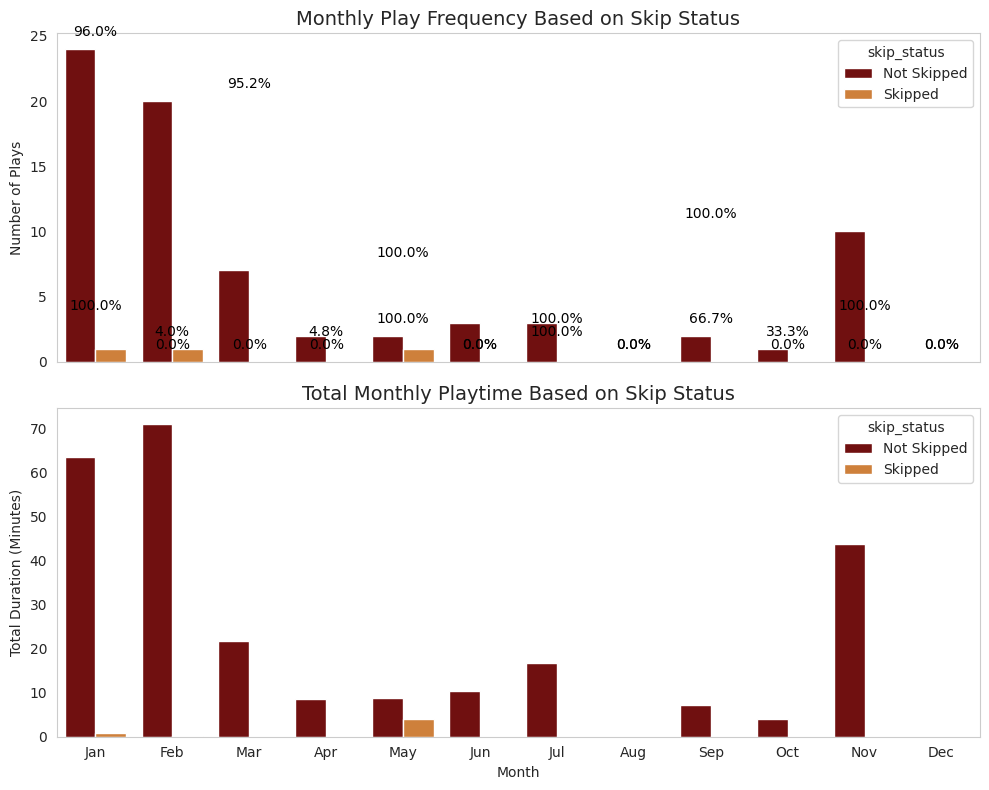

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan 'merged_df' sudah ada dan 'play_time' diparse sebagai datetime.
merged_df = merged_df.copy()

# Filter hanya untuk tahun 2023 dan gunakan .copy() untuk menghindari warning
data_2023 = merged_df[merged_df['play_time'].dt.year == 2023].copy()

# Buat kolom 'skip_status' berdasarkan apakah lagu di-skip atau tidak
data_2023.loc[:, 'skip_status'] = data_2023['skipped'].map({True: 'Skipped', False: 'Not Skipped'})

# Buat kolom 'month' dari 'play_time' (hanya bulan)
data_2023.loc[:, 'month'] = data_2023['play_time'].dt.month

# Mapping angka bulan ke nama bulan
month_labels = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
data_2023.loc[:, 'month_name'] = data_2023['month'].map(month_labels)

# Urutkan bulan secara kronologis
data_2023['month_name'] = pd.Categorical(data_2023['month_name'],
                                         categories=list(month_labels.values()),
                                         ordered=True)

# Agregasi data: hitung jumlah pemutaran per bulan dan total durasi per bulan berdasarkan skip status
monthly_stats = data_2023.groupby(['month_name', 'skip_status'], observed=False).agg(
    play_count=('skip_status', 'count'),  # Hitung jumlah pemutaran
    total_duration=('ms_played', 'sum')  # Total durasi dalam milidetik
).reset_index()

# Konversi total durasi dari milidetik ke menit
monthly_stats['total_duration_min'] = monthly_stats['total_duration'] / (1000 * 60)

# Hitung total pemutaran per bulan
total_plays_per_month = monthly_stats.groupby('month_name', observed=False)['play_count'].sum()

# Hitung persentase skip, menghindari pembagian dengan nol
def calculate_skip_percentage(row):
    total_plays = total_plays_per_month.get(row['month_name'], 0)
    return (row['play_count'] / total_plays * 100) if total_plays > 0 else 0

monthly_stats['skip_percentage'] = monthly_stats.apply(calculate_skip_percentage, axis=1)

# Custom color mapping
custom_palette = {"Skipped": "#E67E22", "Not Skipped": "#800000"}

# Buat figure dengan 2 subplot
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Gunakan bar plot untuk menunjukkan jumlah pemutaran berdasarkan skip status
sns.barplot(data=monthly_stats, x='month_name', y='play_count', hue='skip_status',
            ax=axes[0], palette=custom_palette)
axes[0].set_title("Monthly Play Frequency Based on Skip Status", fontsize=14)
axes[0].set_ylabel("Number of Plays")
axes[0].grid(False)

# Tambahkan teks persentase skip
for index, row in monthly_stats.iterrows():
    axes[0].text(index % 12, row['play_count'] + 1, f"{row['skip_percentage']:.1f}%",
                 ha='center', fontsize=10, color='black')

# Gunakan bar plot untuk total durasi pemutaran dalam menit berdasarkan skip status
sns.barplot(data=monthly_stats, x='month_name', y='total_duration_min', hue='skip_status',
            ax=axes[1], palette=custom_palette)
axes[1].set_title("Total Monthly Playtime Based on Skip Status", fontsize=14)
axes[1].set_ylabel("Total Duration (Minutes)")
axes[1].grid(False)

# Atur label sumbu X agar sejajar
plt.xticks(rotation=0)
plt.xlabel("Month")

plt.tight_layout()
plt.show()


<ipython-input-73-16cab9fdc659>:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_plays_per_month = monthly_stats.groupby('month_name')['play_count'].sum()


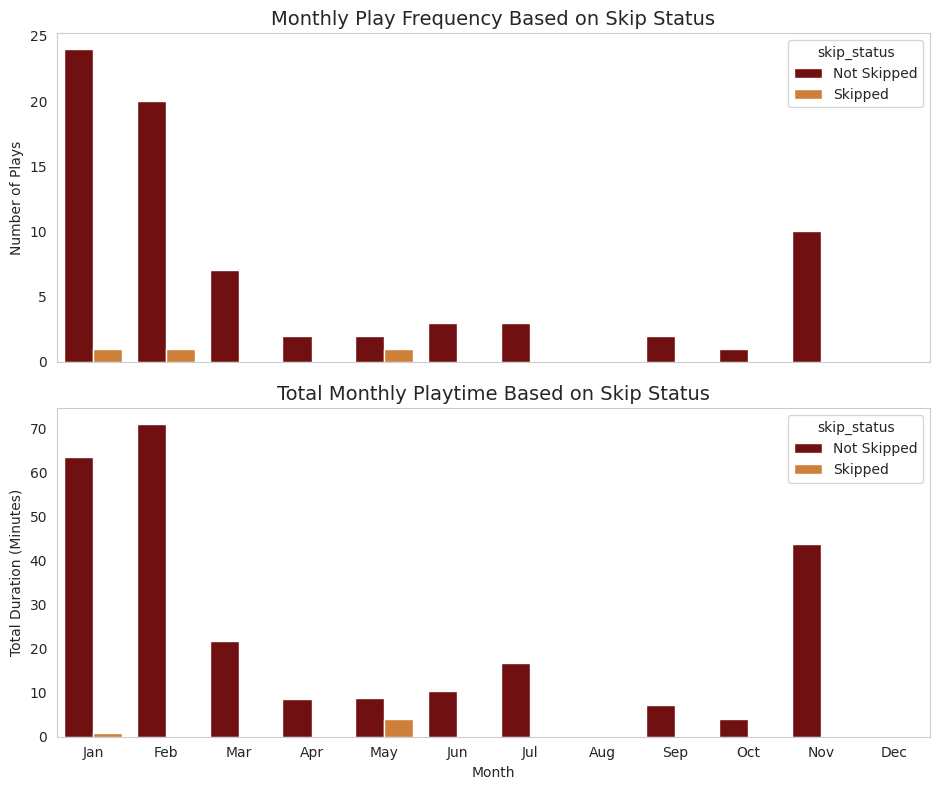

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan 'merged_df' sudah ada dan 'play_time' diparse sebagai datetime.
merged_df = merged_df.copy()

# Filter hanya untuk tahun 2023 dan gunakan .copy() untuk menghindari warning
data_2023 = merged_df[merged_df['play_time'].dt.year == 2023].copy()

# Buat kolom 'skip_status' berdasarkan apakah lagu di-skip atau tidak
data_2023.loc[:, 'skip_status'] = data_2023['skipped'].map({True: 'Skipped', False: 'Not Skipped'})

# Buat kolom 'month' dari 'play_time' (hanya bulan)
data_2023.loc[:, 'month'] = data_2023['play_time'].dt.month

# Mapping angka bulan ke nama bulan
month_labels = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
data_2023.loc[:, 'month_name'] = data_2023['month'].map(month_labels)

# Urutkan bulan secara kronologis
data_2023['month_name'] = pd.Categorical(data_2023['month_name'],
                                         categories=list(month_labels.values()),
                                         ordered=True)

# Agregasi data: hitung jumlah pemutaran per bulan dan total durasi per bulan berdasarkan skip status
monthly_stats = data_2023.groupby(['month_name', 'skip_status'], observed=False).agg(
    play_count=('skip_status', 'count'),  # Hitung jumlah pemutaran
    total_duration=('ms_played', 'sum')  # Total durasi dalam milidetik
).reset_index()

# Konversi total durasi dari milidetik ke menit
monthly_stats['total_duration_min'] = monthly_stats['total_duration'] / (1000 * 60)

# Hitung total pemutaran per bulan
total_plays_per_month = monthly_stats.groupby('month_name')['play_count'].sum()

# Hitung persentase skip per bulan
monthly_stats['skip_percentage'] = monthly_stats.apply(
    lambda row: (row['play_count'] / total_plays_per_month[row['month_name']]) * 100 if total_plays_per_month[row['month_name']] > 0 else 0,
    axis=1
)

# Custom color mapping
custom_palette = {"Skipped": "#E67E22", "Not Skipped": "#800000"}

# Buat figure dengan 2 subplot
fig, axes = plt.subplots(2, 1, figsize=(9.5, 8), sharex=True)

# Plot jumlah pemutaran berdasarkan skip status
sns.barplot(data=monthly_stats, x='month_name', y='play_count', hue='skip_status',
            ax=axes[0], palette=custom_palette)
axes[0].set_title("Monthly Play Frequency Based on Skip Status", fontsize=14)
axes[0].set_ylabel("Number of Plays")
axes[0].grid(False)

'''
# Tambahkan persentase hanya pada grafik pertama (jumlah pemutaran)
for index, row in monthly_stats.iterrows():
    if row['skip_status'] == "Skipped":  # Pastikan hanya untuk "Skipped"
        axes[0].text(row['month_name'], row['play_count'] + 0.5,
                     f"{row['skip_percentage']:.1f}%",
                     ha='left', fontsize=10, color='black')
'''

# Plot total durasi pemutaran dalam menit berdasarkan skip status
sns.barplot(data=monthly_stats, x='month_name', y='total_duration_min', hue='skip_status',
            ax=axes[1], palette=custom_palette)
axes[1].set_title("Total Monthly Playtime Based on Skip Status", fontsize=14)
axes[1].set_ylabel("Total Duration (Minutes)")
axes[1].grid(False)

# Atur label sumbu X agar sejajar
plt.xticks(rotation=0)
plt.xlabel("Month")

plt.tight_layout()
plt.show()


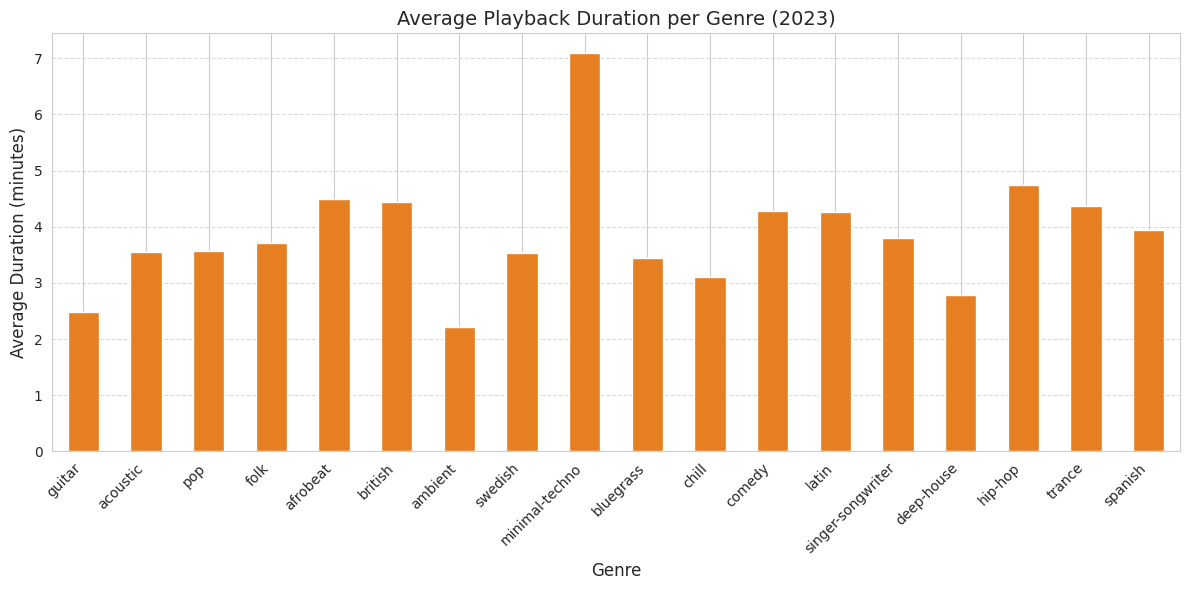

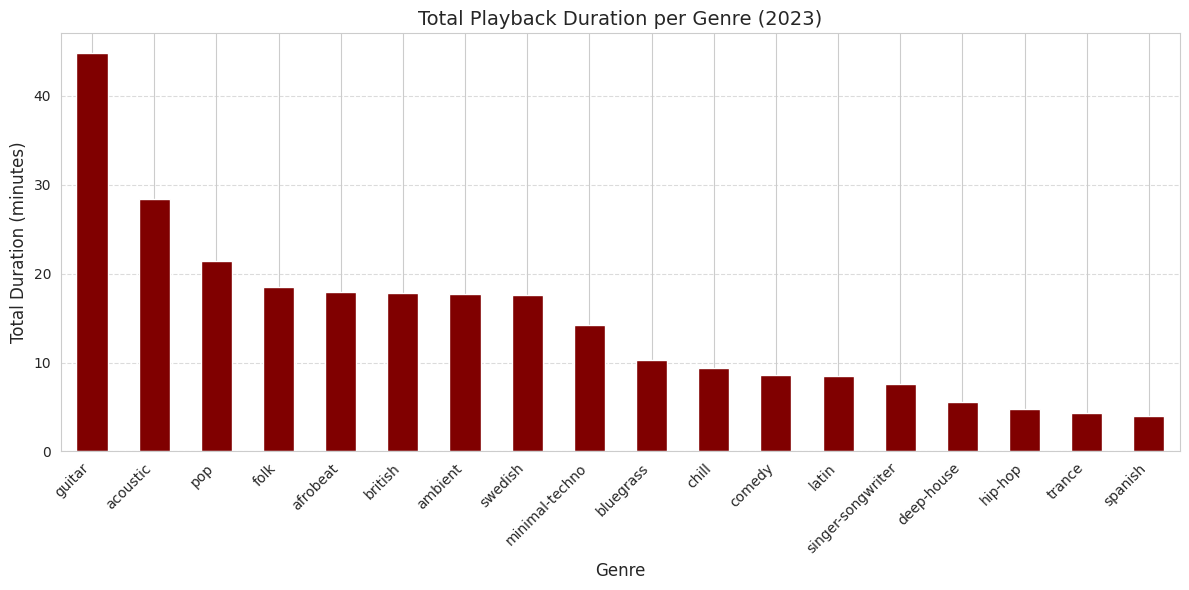

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Pastikan 'play_time' dalam format datetime
merged_df['play_time'] = pd.to_datetime(merged_df['play_time'])

# Filter hanya data tahun 2023
data_2023 = merged_df[merged_df['play_time'].dt.year == 2023].copy()

# Konversi durasi dari milidetik ke menit
data_2023['duration_min'] = data_2023['ms_played'] / (1000 * 60)

# Hitung rata-rata dan total durasi pemutaran per genre
genre_duration = data_2023.groupby('track_genre')['duration_min'].agg(['mean', 'sum']).sort_values(by='sum', ascending=False)

# Plot bar chart untuk rata-rata durasi per genre
plt.figure(figsize=(12, 6))
genre_duration['mean'].plot(kind='bar', color='#E67E22', edgecolor='white')

# Tambahkan judul dan label
plt.title('Average Playback Duration per Genre (2023)', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Duration (minutes)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan grafik
plt.tight_layout()
plt.show()

# Plot bar chart untuk total durasi pemutaran per genre
plt.figure(figsize=(12, 6))
genre_duration['sum'].plot(kind='bar', color='#800000', edgecolor='white')

# Tambahkan judul dan label
plt.title('Total Playback Duration per Genre (2023)', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Total Duration (minutes)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Tampilkan grafik
plt.tight_layout()
plt.show()


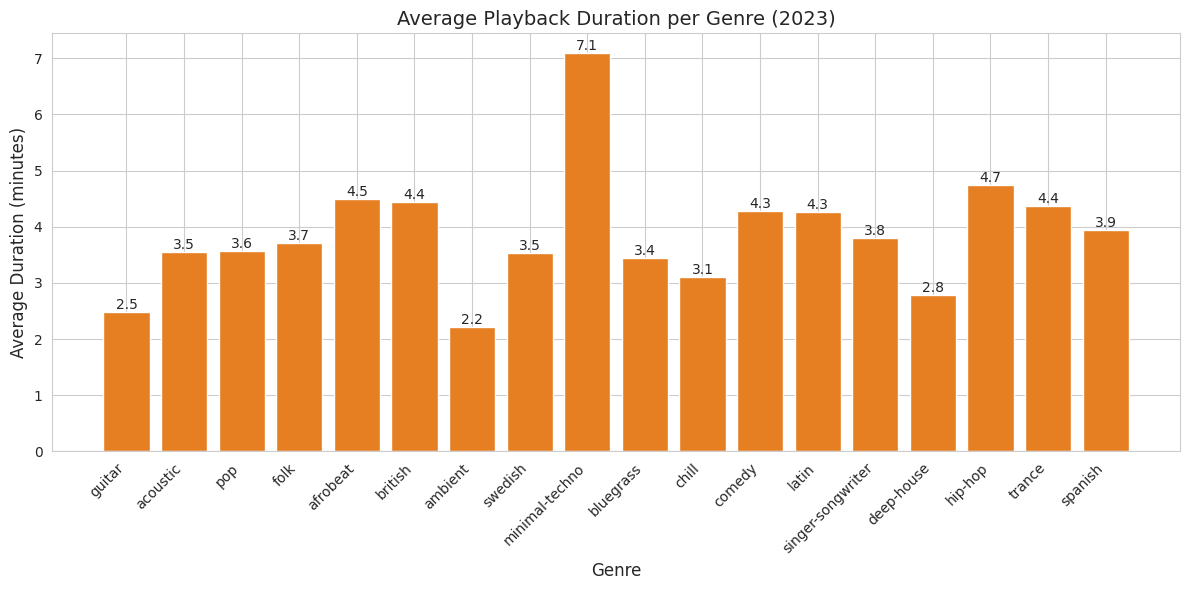

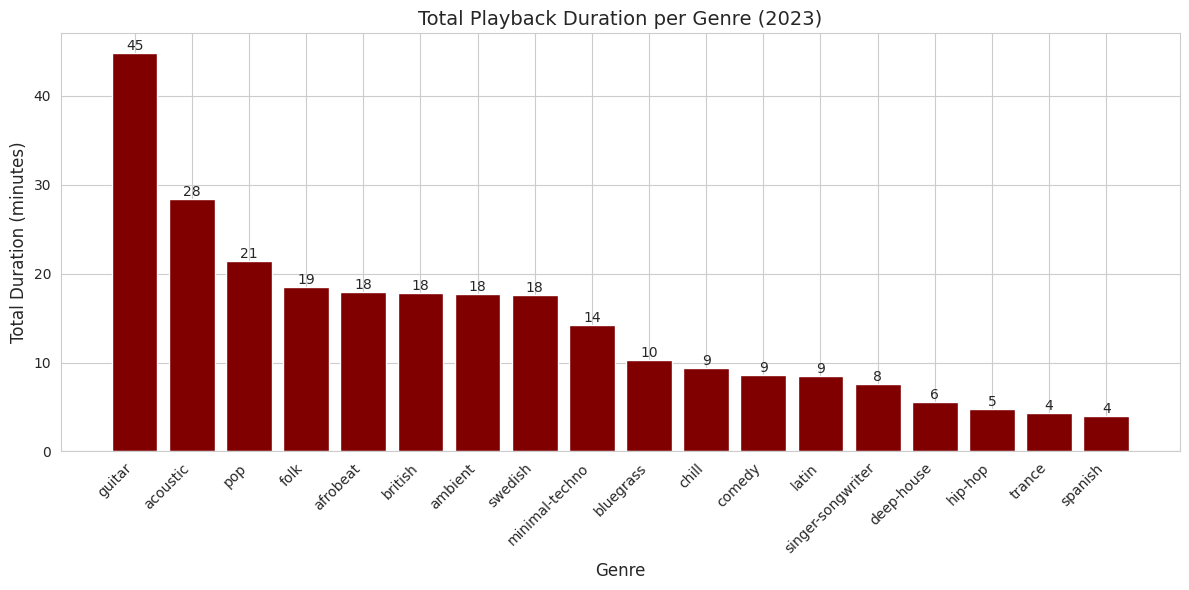

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Pastikan 'play_time' dalam format datetime
merged_df['play_time'] = pd.to_datetime(merged_df['play_time'])

# Filter hanya data tahun 2023
data_2023 = merged_df[merged_df['play_time'].dt.year == 2023].copy()

# Konversi durasi dari milidetik ke menit
data_2023['duration_min'] = data_2023['ms_played'] / (1000 * 60)

# Hitung rata-rata dan total durasi pemutaran per genre
genre_duration = data_2023.groupby('track_genre')['duration_min'].agg(['mean', 'sum']).sort_values(by='sum', ascending=False)

ax.grid(False)
# Plot bar chart untuk rata-rata durasi per genre
plt.figure(figsize=(12, 6))
bars = plt.bar(genre_duration.index, genre_duration['mean'], color='#E67E22', edgecolor='white')

# Tambahkan label di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}', ha='center', va='bottom', fontsize=10)

# Tambahkan judul dan label
plt.title('Average Playback Duration per Genre (2023)', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Duration (minutes)', fontsize=12)
plt.xticks(rotation=45, ha='right')
axes[0].grid(False)

# Tampilkan grafik
plt.tight_layout()
plt.show()


# Plot bar chart untuk total durasi pemutaran per genre
plt.figure(figsize=(12, 6))
bars = plt.bar(genre_duration.index, genre_duration['sum'], color='#800000', edgecolor='white')

# Tambahkan label di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.0f}', ha='center', va='bottom', fontsize=10)

# Tambahkan judul dan label
plt.title('Total Playback Duration per Genre (2023)', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Total Duration (minutes)', fontsize=12)
plt.xticks(rotation=45, ha='right')
axes[1].grid(False)

# Tampilkan grafik
plt.tight_layout()
plt.show()


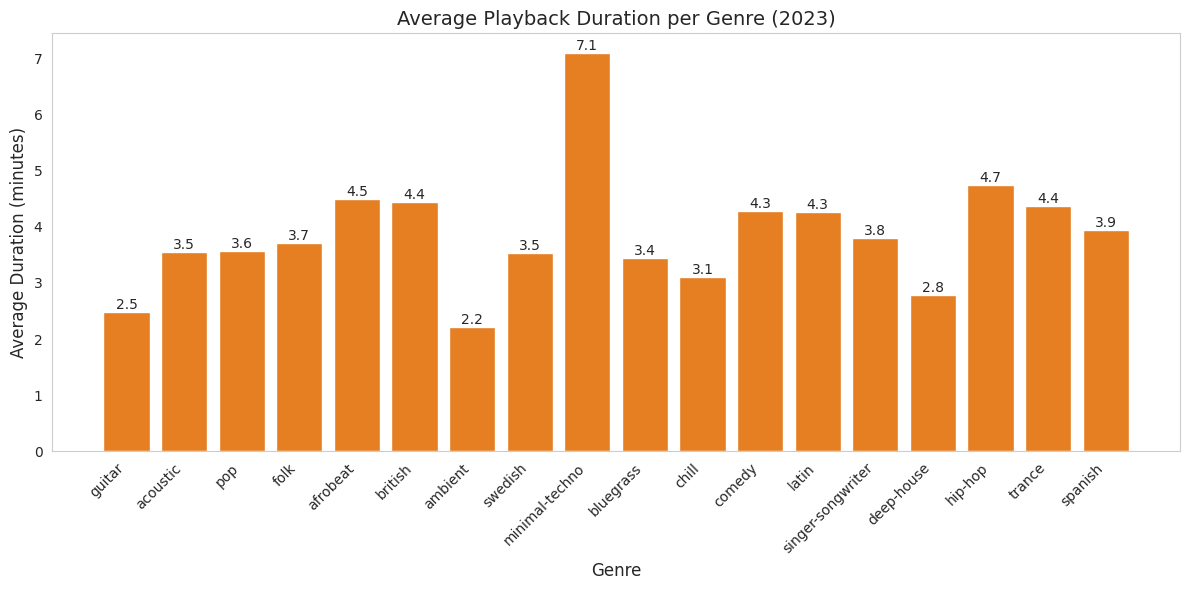

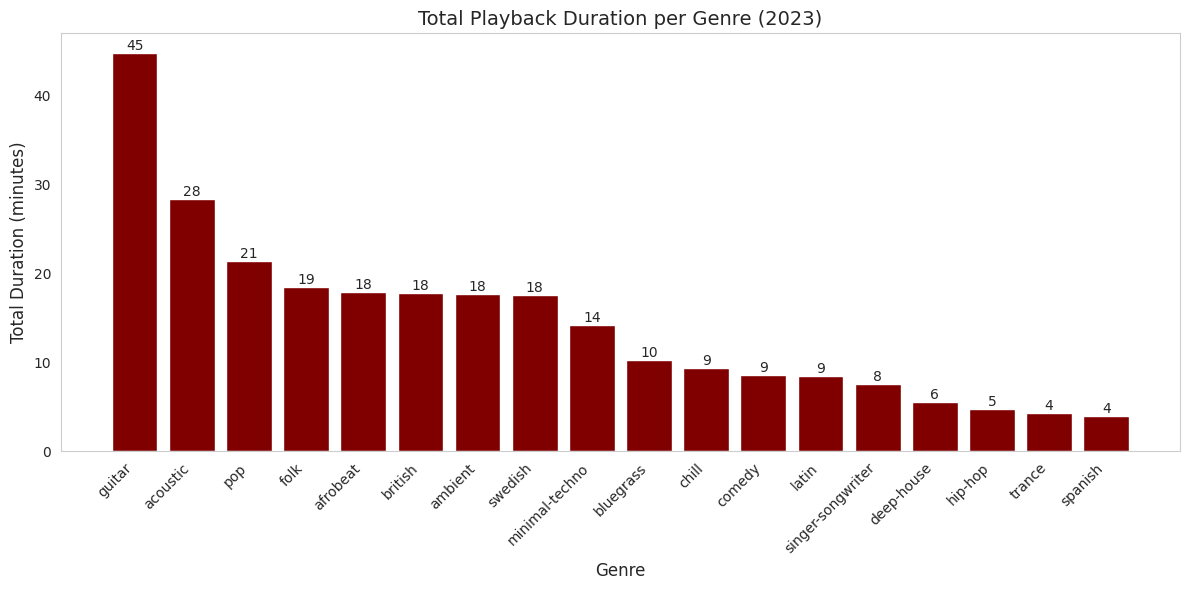

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Pastikan 'play_time' dalam format datetime
merged_df['play_time'] = pd.to_datetime(merged_df['play_time'])

# Filter hanya data tahun 2023
data_2023 = merged_df[merged_df['play_time'].dt.year == 2023].copy()

# Konversi durasi dari milidetik ke menit
data_2023['duration_min'] = data_2023['ms_played'] / (1000 * 60)

# Hitung rata-rata dan total durasi pemutaran per genre
genre_duration = data_2023.groupby('track_genre')['duration_min'].agg(['mean', 'sum']).sort_values(by='sum', ascending=False)

# Plot bar chart untuk rata-rata durasi per genre
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(genre_duration.index, genre_duration['mean'], color='#E67E22', edgecolor='white')

# Tambahkan label di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}', ha='center', va='bottom', fontsize=10)

# Tambahkan judul dan label
ax.set_title('Average Playback Duration per Genre (2023)', fontsize=14)
ax.set_xlabel('Genre', fontsize=12)
ax.set_ylabel('Average Duration (minutes)', fontsize=12)

# Atur label sumbu x dengan benar
ax.set_xticks(range(len(genre_duration.index)))
ax.set_xticklabels(genre_duration.index, rotation=45, ha='right')

# Hapus grid
ax.grid(False)

# Tampilkan grafik
plt.tight_layout()
plt.show()


# Plot bar chart untuk total durasi pemutaran per genre
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(genre_duration.index, genre_duration['sum'], color='#800000', edgecolor='white')

# Tambahkan label di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.0f}', ha='center', va='bottom', fontsize=10)

# Tambahkan judul dan label
ax.set_title('Total Playback Duration per Genre (2023)', fontsize=14)
ax.set_xlabel('Genre', fontsize=12)
ax.set_ylabel('Total Duration (minutes)', fontsize=12)

# Atur label sumbu x dengan benar
ax.set_xticks(range(len(genre_duration.index)))
ax.set_xticklabels(genre_duration.index, rotation=45, ha='right')

# Hapus grid
ax.grid(False)

# Tampilkan grafik
plt.tight_layout()
plt.show()


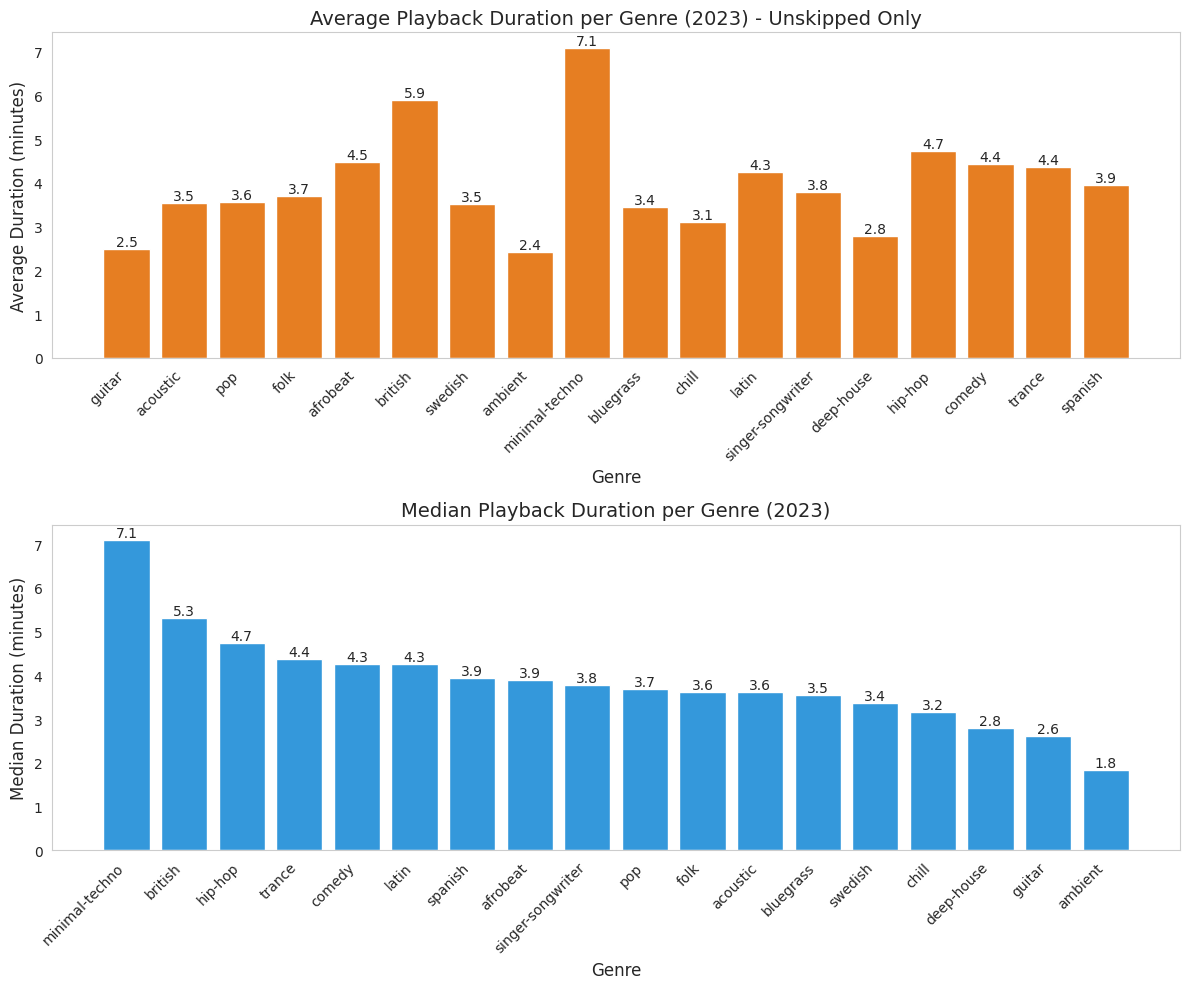

🔹 Rata-rata dan total durasi unskipped per genre:
                        mean        sum
track_genre                           
guitar             2.489427  44.809683
acoustic           3.546469  28.371750
pop                3.571094  21.426567
folk               3.701917  18.509583
afrobeat           4.485192  17.940767
british            5.903678  17.711033
swedish            3.526397  17.631983
ambient            2.414219  16.899533
minimal-techno     7.087708  14.175417
bluegrass          3.445306  10.335917
chill              3.108689   9.326067
latin              4.260408   8.520817
singer-songwriter  3.790942   7.581883
deep-house         2.790692   5.581383
hip-hop            4.736667   4.736667
comedy             4.432433   4.432433
trance             4.370000   4.370000
spanish            3.941767   3.941767

🔹 Median durasi pemutaran per genre:
 track_genre
minimal-techno       7.087708
british              5.321517
hip-hop              4.736667
trance               4.37000

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Pastikan 'play_time' dalam format datetime
merged_df['play_time'] = pd.to_datetime(merged_df['play_time'])

# Filter hanya data tahun 2023
data_2023 = merged_df[merged_df['play_time'].dt.year == 2023].copy()

# Konversi durasi dari milidetik ke menit
data_2023['duration_min'] = data_2023['ms_played'] / (1000 * 60)

# ---- ANALISIS UN-SKIPPED ----
# Filter hanya lagu yang tidak di-skip
unskipped_data = data_2023[data_2023['skipped'] == False]

# Hitung rata-rata dan total durasi pemutaran per genre hanya untuk unskipped
genre_duration_unskip = unskipped_data.groupby('track_genre')['duration_min'].agg(['mean', 'sum']).sort_values(by='sum', ascending=False)

# ---- ANALISIS MEDIAN DURASI ----
# Hitung median durasi per genre
genre_median_duration = data_2023.groupby('track_genre')['duration_min'].median().sort_values(ascending=False)

# ---- ANALISIS DURASI ASLI LAGU ----
# Pastikan dataset memiliki durasi asli lagu
if 'track_duration_ms' in data_2023.columns:
    genre_song_length = data_2023.groupby('track_genre')['track_duration_ms'].median() / (1000 * 60)
else:
    genre_song_length = None

# ---- VISUALISASI ----
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# 1️⃣ Grafik Rata-rata Durasi Unskipped
ax = axs[0]
bars = ax.bar(genre_duration_unskip.index, genre_duration_unskip['mean'], color='#E67E22', edgecolor='white')

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}', ha='center', va='bottom', fontsize=10)

ax.set_title('Average Playback Duration per Genre (2023) - Unskipped Only', fontsize=14)
ax.set_xlabel('Genre', fontsize=12)
ax.set_ylabel('Average Duration (minutes)', fontsize=12)
ax.set_xticks(range(len(genre_duration_unskip.index)))
ax.set_xticklabels(genre_duration_unskip.index, rotation=45, ha='right')
ax.grid(False)

# 2️⃣ Grafik Median Durasi Lagu
ax = axs[1]
bars = ax.bar(genre_median_duration.index, genre_median_duration.values, color='#3498DB', edgecolor='white')

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}', ha='center', va='bottom', fontsize=10)

ax.set_title('Median Playback Duration per Genre (2023)', fontsize=14)
ax.set_xlabel('Genre', fontsize=12)
ax.set_ylabel('Median Duration (minutes)', fontsize=12)
ax.set_xticks(range(len(genre_median_duration.index)))
ax.set_xticklabels(genre_median_duration.index, rotation=45, ha='right')
ax.grid(False)

plt.tight_layout()
plt.show()

# ---- CETAK HASIL UNTUK ANALISIS ----
print("🔹 Rata-rata dan total durasi unskipped per genre:\n", genre_duration_unskip)
print("\n🔹 Median durasi pemutaran per genre:\n", genre_median_duration)

if genre_song_length is not None:
    print("\n🔹 Median durasi asli lagu per genre:\n", genre_song_length)


In [ ]:
genre_song_length = data_2023.groupby('track_genre')['ms_played'].median() / (1000 * 60)
print(genre_song_length)


track_genre
acoustic             3.617592
afrobeat             3.891100
ambient              1.829533
bluegrass            3.543917
british              5.321517
chill                3.154167
comedy               4.271650
deep-house           2.790692
folk                 3.624433
guitar               2.604408
hip-hop              4.736667
latin                4.260408
minimal-techno       7.087708
pop                  3.681217
singer-songwriter    3.790942
spanish              3.941767
swedish              3.373100
trance               4.370000
Name: ms_played, dtype: float64


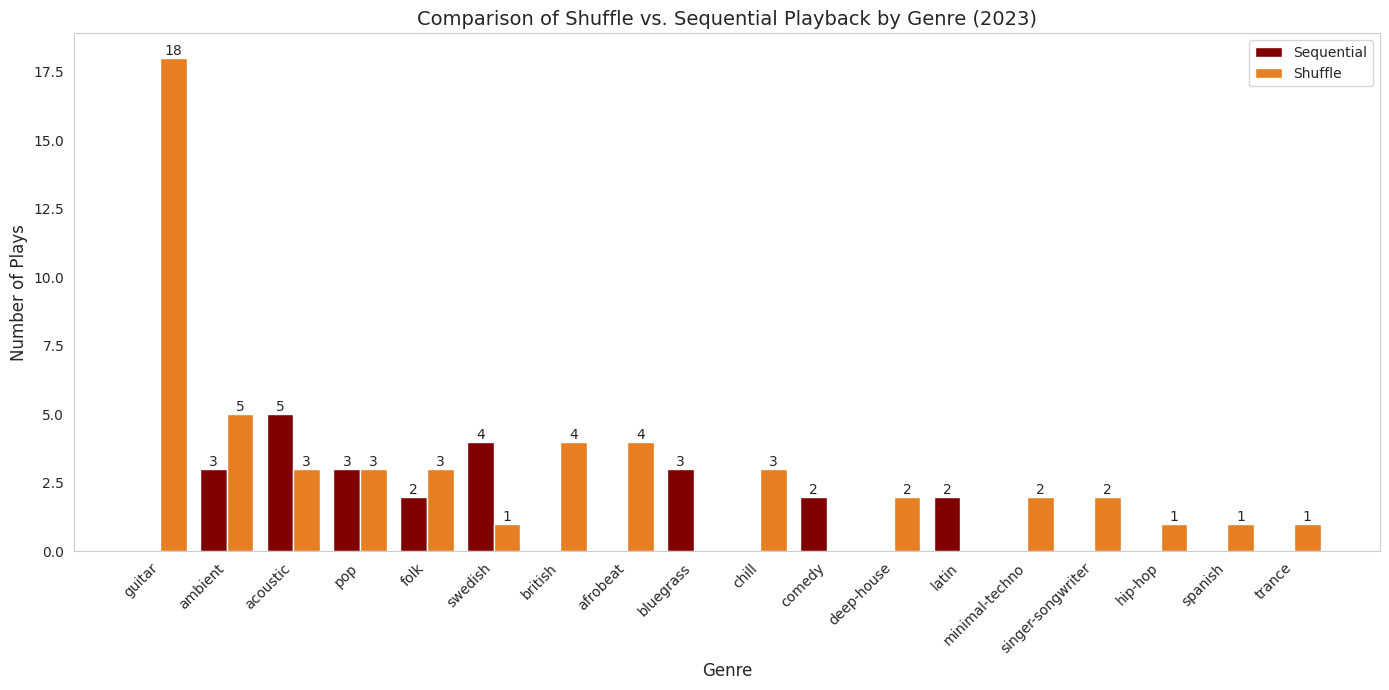

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Pastikan 'play_time' dalam format datetime
merged_df['play_time'] = pd.to_datetime(merged_df['play_time'])

# Filter hanya data tahun 2023
data_2023 = merged_df[merged_df['play_time'].dt.year == 2023].copy()

# Konversi kolom shuffle ke format boolean
data_2023['shuffle'] = data_2023['shuffle'].astype(bool)

# Hitung jumlah pemutaran berdasarkan mode shuffle vs. sequential untuk setiap genre
shuffle_counts = data_2023.groupby(['track_genre', 'shuffle']).size().unstack(fill_value=0)

# Pastikan ada dua kolom (False = Sequential, True = Shuffle)
shuffle_counts.columns = ['Sequential', 'Shuffle']

# Urutkan berdasarkan jumlah total pemutaran
shuffle_counts['Total'] = shuffle_counts['Sequential'] + shuffle_counts['Shuffle']
shuffle_counts = shuffle_counts.sort_values(by='Total', ascending=False).drop(columns=['Total'])

# Plot bar chart untuk perbandingan mode shuffle vs. sequential
fig, ax = plt.subplots(figsize=(14, 7))

# Posisi bar di sumbu x
x = np.arange(len(shuffle_counts))

# Lebar bar
width = 0.4

# Plot Sequential
bars1 = ax.bar(x - width/2, shuffle_counts['Sequential'], width, label='Sequential', color='#800000', edgecolor='white')

# Plot Shuffle
bars2 = ax.bar(x + width/2, shuffle_counts['Shuffle'], width, label='Shuffle', color='#E67E22', edgecolor='white')

# Tambahkan label di atas setiap bar
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        if yval > 0:  # Tambahkan label hanya jika ada nilai
            ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}', ha='center', va='bottom', fontsize=10)

# Tambahkan judul dan label
ax.set_title('Comparison of Shuffle vs. Sequential Playback by Genre (2023)', fontsize=14)
ax.set_xlabel('Genre', fontsize=12)
ax.set_ylabel('Number of Plays', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(shuffle_counts.index, rotation=45, ha='right')

# Tambahkan legenda
ax.legend()

# Hapus grid
ax.grid(False)

# Tampilkan grafik
plt.tight_layout()
plt.show()


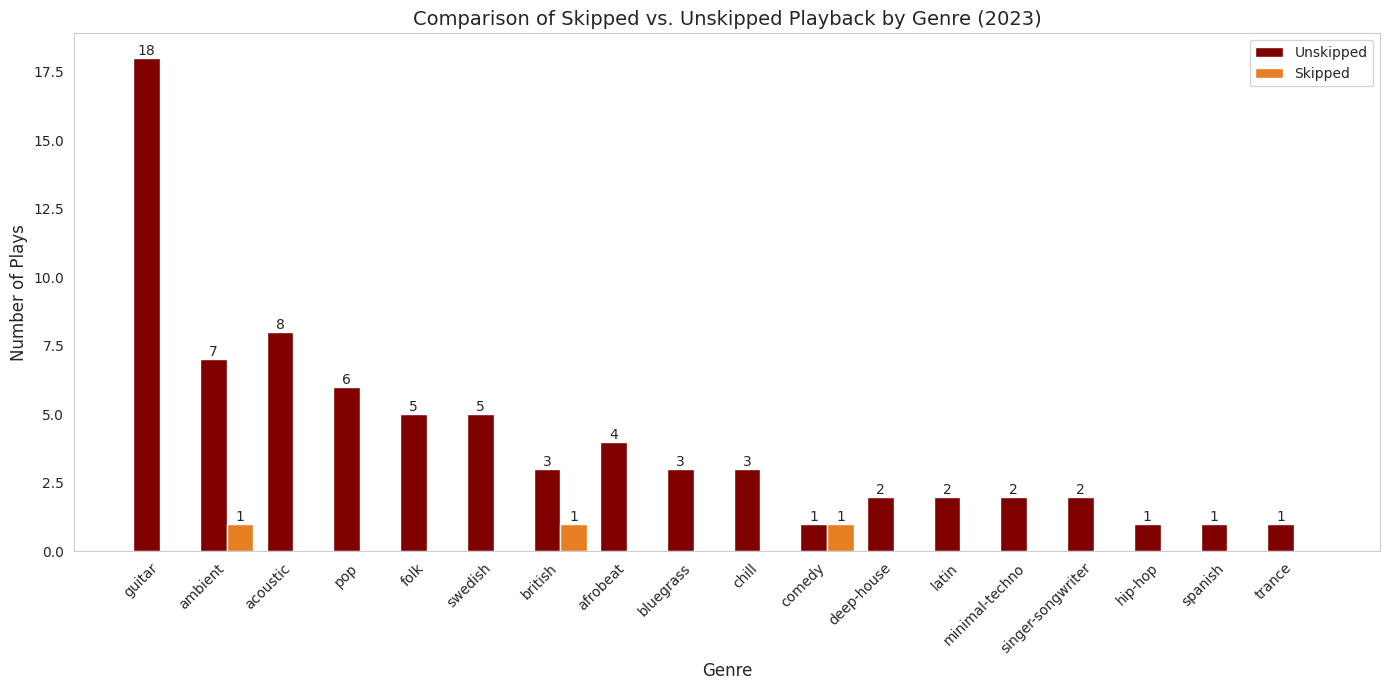

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Pastikan 'play_time' dalam format datetime
merged_df['play_time'] = pd.to_datetime(merged_df['play_time'])

# Filter hanya data tahun 2023
data_2023 = merged_df[merged_df['play_time'].dt.year == 2023].copy()

# Konversi kolom skipped ke format boolean
data_2023['skipped'] = data_2023['skipped'].astype(bool)

# Hitung jumlah lagu yang di-skip dan tidak di-skip per genre
skip_counts = data_2023.groupby(['track_genre', 'skipped']).size().unstack(fill_value=0)

# Pastikan ada dua kolom (False = Unskipped, True = Skipped)
skip_counts.columns = ['Unskipped', 'Skipped']

# Urutkan berdasarkan jumlah total pemutaran
skip_counts['Total'] = skip_counts['Unskipped'] + skip_counts['Skipped']
skip_counts = skip_counts.sort_values(by='Total', ascending=False).drop(columns=['Total'])

# Plot bar chart untuk perbandingan skipped vs. unskipped
fig, ax = plt.subplots(figsize=(14, 7))

# Posisi bar di sumbu x
x = np.arange(len(skip_counts))

# Lebar bar
width = 0.4

# Plot Unskipped
bars1 = ax.bar(x - width/2, skip_counts['Unskipped'], width, label='Unskipped', color='#800000', edgecolor='white')

# Plot Skipped
bars2 = ax.bar(x + width/2, skip_counts['Skipped'], width, label='Skipped', color='#E67E22', edgecolor='white')

# Tambahkan label di atas setiap bar
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        if yval > 0:  # Tambahkan label hanya jika ada nilai
            ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}', ha='center', va='bottom', fontsize=10)

# Tambahkan judul dan label
ax.set_title('Comparison of Skipped vs. Unskipped Playback by Genre (2023)', fontsize=14)
ax.set_xlabel('Genre', fontsize=12)
ax.set_ylabel('Number of Plays', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(skip_counts.index, rotation=45, ha='right')

# Tambahkan legenda
ax.legend()

# Hapus grid
ax.grid(False)

# Tampilkan grafik
plt.tight_layout()
plt.show()


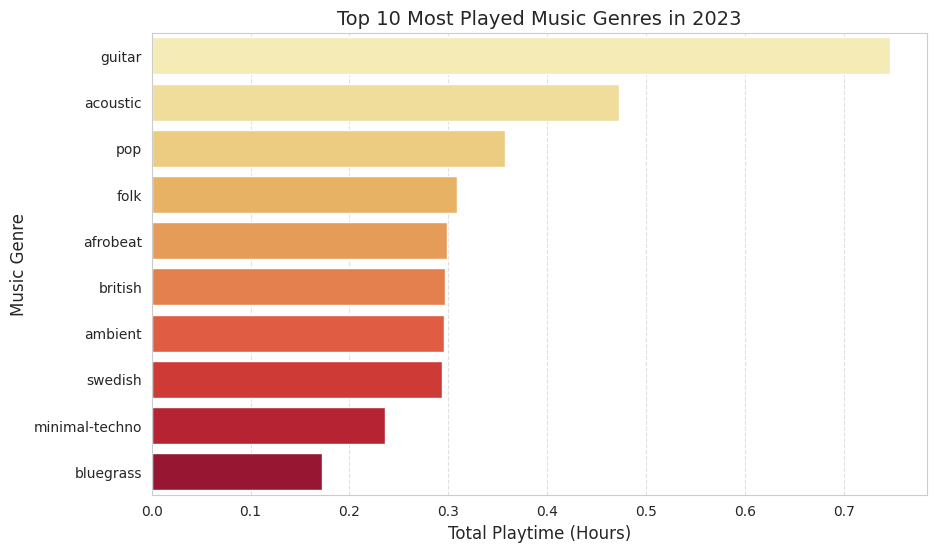

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Load Data ===
# Pastikan dataset memiliki kolom 'play_time', 'ms_played', dan 'track_genre'
df = merged_df
# === 2. Filter Data Tahun 2023 ===
df_2023 = df[df['play_time'].dt.year == 2023].copy()

# === 3. Hitung Total Durasi Pemutaran per Genre ===
genre_duration = df_2023.groupby('track_genre', observed=False)['ms_played'].sum().reset_index()

# === 4. Konversi Durasi dari Milidetik ke Jam ===
genre_duration['total_hours'] = genre_duration['ms_played'] / (1000 * 60 * 60)

# === 5. Urutkan berdasarkan durasi tertinggi ===
genre_duration = genre_duration.sort_values(by='total_hours', ascending=False)

# === 6. Visualisasi Genre Terpopuler ===
plt.figure(figsize=(10, 6))
sns.barplot(data=genre_duration.head(10), y='track_genre', x='total_hours', hue='track_genre', palette='YlOrRd', legend=False)

# === 7. Customisasi Plot ===
plt.xlabel("Total Playtime (Hours)", fontsize=12)
plt.ylabel("Music Genre", fontsize=12)
plt.title("Top 10 Most Played Music Genres in 2023", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()



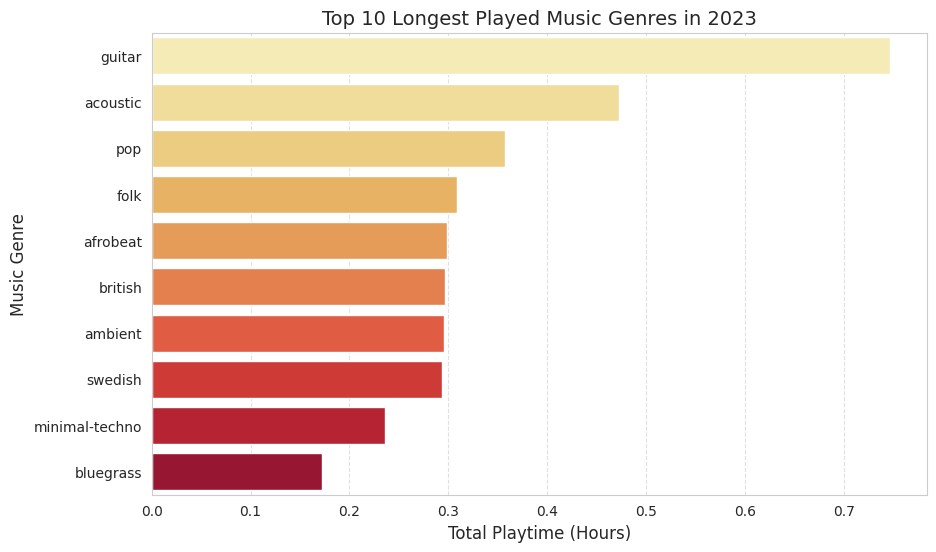

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Load Data ===
# Pastikan dataset memiliki kolom 'play_time', 'ms_played', dan 'track_genre'
df = merged_df

# === 2. Filter Data Tahun 2023 ===
df_2023 = df[df['play_time'].dt.year == 2023].copy()

# === 3. Hitung Total Durasi Pemutaran per Genre ===
genre_duration = df_2023.groupby('track_genre', observed=False)['ms_played'].sum().reset_index()

# === 4. Konversi Durasi dari Milidetik ke Jam ===
genre_duration['total_hours'] = genre_duration['ms_played'] / (1000 * 60 * 60)

# === 5. Urutkan berdasarkan total durasi ===
genre_duration = genre_duration.sort_values(by='total_hours', ascending=False).head(10)

# === 6. Visualisasi Genre dengan Total Durasi Pemutaran Terlama ===
plt.figure(figsize=(10, 6))
sns.barplot(data=genre_duration, y='track_genre', x='total_hours', hue='track_genre', palette='YlOrRd', legend=False)

# Label dan Judul Grafik
plt.xlabel("Total Playtime (Hours)", fontsize=12)
plt.ylabel("Music Genre", fontsize=12)
plt.title("Top 10 Longest Played Music Genres in 2023", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Tampilkan Plot
plt.show()



In [ ]:
print(set(genre_duration.index) == set(skip_counts.index))


False


In [ ]:
play_counts = data_2023.groupby('track_genre')['track_name'].count()
print(play_counts)


track_genre
acoustic              8
afrobeat              4
ambient               8
bluegrass             3
british               4
chill                 3
comedy                2
deep-house            2
folk                  5
guitar               18
hip-hop               1
latin                 2
minimal-techno        2
pop                   6
singer-songwriter     2
spanish               1
swedish               5
trance                1
Name: track_name, dtype: int64


In [ ]:
data_2023['duration_min'] = data_2023['ms_played'] / (1000 * 60)


In [ ]:
genre_song_length = data_2023.groupby('track_genre')['duration_min'].median()
print(genre_song_length)


track_genre
acoustic             3.617592
afrobeat             3.891100
ambient              1.829533
bluegrass            3.543917
british              5.321517
chill                3.154167
comedy               4.271650
deep-house           2.790692
folk                 3.624433
guitar               2.604408
hip-hop              4.736667
latin                4.260408
minimal-techno       7.087708
pop                  3.681217
singer-songwriter    3.790942
spanish              3.941767
swedish              3.373100
trance               4.370000
Name: duration_min, dtype: float64


In [ ]:
# Simpan DataFrame ke file Excel
merged_df.to_excel("merged_df.xlsx", index=False)

# Unduh file Excel
from google.colab import files
files.download("merged_df.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>